In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

plt.style.use('default')
plt.rcParams.update({'figure.max_open_warning': 0})
pd.options.display.float_format = '{:20,.2f}'.format
sns.set(style="whitegrid")

df = pd.read_csv('../data/train.csv', low_memory=False, index_col='id', parse_dates=['fecha'])
df.head()

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,"23,533.00",nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,...,"48,551.00",nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,"650,000.00"
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,...,"47,835.00",nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"


In [13]:
# Renombro los atributos
df.rename(columns={"tipodepropiedad" : "tipo_de_propiedad", "metrostotales" : "metros_totales", "metroscubiertos" : "metros_cubiertos",\
                   "usosmultiples" : "usos_multiples", "escuelascercanas" : "escuelas_cercanas",\
                   "centroscomercialescercanos" : "centros_comerciales_cercanos"}, inplace=True)
df.head()

,titulo,descripcion,tipo_de_propiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usos_multiples,piscina,escuelas_cercanas,centros_comerciales_cercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,"23,533.00",nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,...,"48,551.00",nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,"650,000.00"
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,...,"47,835.00",nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"


### Resumen de las propiedades del set de datos

In [67]:
print("El set de datos tiene una forma de", df.shape)

El set de datos tiene una forma de (240000, 22)


In [68]:
# Resumen de algunas estadisticas
df.describe()

,antiguedad,habitaciones,garages,banos,metros_cubiertos,metros_totales,idzona,lat,lng,gimnasio,usos_multiples,piscina,escuelas_cercanas,centros_comerciales_cercanos,precio
count,"196,445.00","217,529.00","202,235.00","213,779.00","222,600.00","188,533.00","211,379.00","116,512.00","116,512.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00"
mean,8.12,2.90,1.55,2.13,174.02,176.77,"2,423,467.82",20.70,-99.51,0.06,0.06,0.09,0.44,0.40,"2,530,838.35"
std,9.55,0.90,0.85,0.91,98.15,94.43,"10,567,938.36",3.14,9.74,0.24,0.23,0.28,0.50,0.49,"2,152,551.80"
min,0.00,1.00,0.00,1.00,15.00,15.00,22.00,-100.89,-125.86,0.00,0.00,0.00,0.00,0.00,"310,000.00"
25%,0.00,2.00,1.00,1.00,90.00,102.00,"24,890.00",19.36,-100.98,0.00,0.00,0.00,0.00,0.00,"952,772.50"
50%,5.00,3.00,2.00,2.00,153.00,155.00,"56,383.00",19.54,-99.24,0.00,0.00,0.00,0.00,0.00,"1,850,000.00"
75%,10.00,3.00,2.00,3.00,240.00,238.00,"87,838.00",20.74,-99.13,0.00,0.00,0.00,1.00,1.00,"3,390,000.00"
max,80.00,10.00,3.00,4.00,439.00,439.00,"50,003,999.00",83.03,121.04,1.00,1.00,1.00,1.00,1.00,"12,525,000.00"


In [69]:
# Cantidad de provincias
df["provincia"].unique()

array(['Distrito Federal', 'Jalisco', 'Edo. de México', 'Oaxaca',
       'Quintana Roo', 'Colima', 'San luis Potosí', 'Nuevo León',
       'Querétaro', 'Tamaulipas', 'Puebla', 'Yucatán', 'Morelos',
       'Guerrero', 'Tabasco', 'Guanajuato', 'Hidalgo', 'Veracruz',
       'Chihuahua', 'Aguascalientes', 'Sonora', 'Michoacán',
       'Baja California Norte', 'Baja California Sur', 'Coahuila',
       'Durango', 'Sinaloa', 'Chiapas', 'Nayarit', 'Tlaxcala', 'Campeche',
       'Zacatecas', nan], dtype=object)

In [70]:
# Cantidad de distintos tipos de propiedad
df["tipo_de_propiedad"].nunique()

24

In [71]:
# Cantidad de banios
df["banos"].value_counts()

2.00    87683
1.00    58173
3.00    49365
4.00    18558
Name: banos, dtype: int64

In [72]:
# Cantidad de garages
df["garages"].value_counts()

2.00    94167
1.00    59464
0.00    26926
3.00    21678
Name: garages, dtype: int64

In [73]:
# Cantidad de habitaciones
df["habitaciones"].value_counts()

 3.00    121887
 2.00     57808
 4.00     25068
 1.00      5069
 5.00      4596
 6.00      1669
 7.00       539
 8.00       398
10.00       316
 9.00       179
Name: habitaciones, dtype: int64

In [74]:
# Cuantas propiedades tienen SUM
df["usos_multiples"].value_counts()

0.00    226778
1.00     13222
Name: usos_multiples, dtype: int64

In [75]:
# Cuantas propiedades tienen gimnasio
df["gimnasio"].value_counts()

0.00    225006
1.00     14994
Name: gimnasio, dtype: int64

In [76]:
# Cuantas propiedades tienen piscina
df["piscina"].value_counts()

0.00    219028
1.00     20972
Name: piscina, dtype: int64

## Analisis general a nivel provincial

#### Cantidad de publicaciones/propiedades segun provincia

Text(0, 0.5, 'Nombre de provincia')

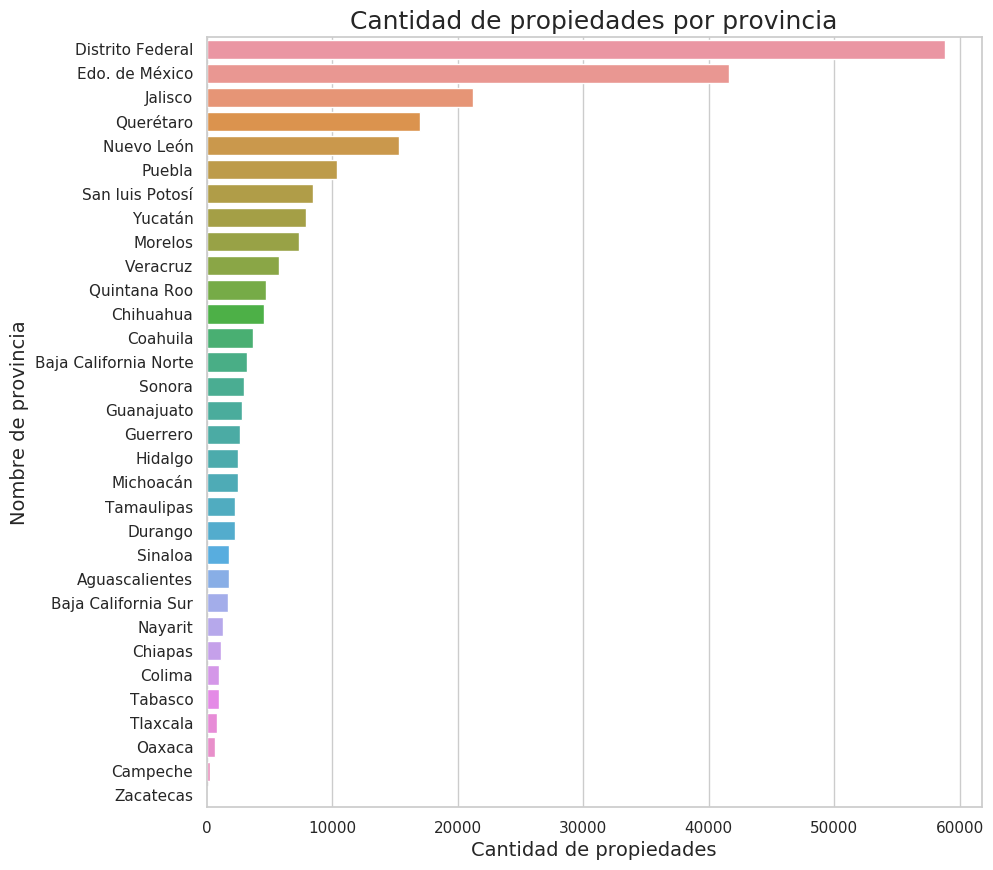

In [77]:
cantidad_prop_por_provincia = df["provincia"].value_counts()
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=cantidad_prop_por_provincia.values, y=cantidad_prop_por_provincia.index, orient="h")
g.set_title("Cantidad de propiedades por provincia", fontsize=18)
g.set_xlabel("Cantidad de propiedades", fontsize=14)
g.set_ylabel("Nombre de provincia", fontsize=14)

#### Cantidad de cada tipo de propiedad por provincia

In [71]:
tipos_por_provincia = df.groupby(["provincia", "tipo_de_propiedad"]).agg({"tipo_de_propiedad" : "count"})
tipos_por_provincia_unstacked = tipos_por_provincia.unstack(level=-1).fillna(0)
tipos_por_provincia_unstacked.head()

tipo_de_propiedad                       \
tipo_de_propiedad              Apartamento     Bodega comercial   
provincia                                                         
Aguascalientes                       47.00                 7.00   
Baja California Norte               196.00                 4.00   
Baja California Sur                  82.00                 2.00   
Campeche                              7.00                 1.00   
Chiapas                              52.00                 8.00   

                                                                 \
tipo_de_propiedad                     Casa   Casa en condominio   
provincia                                                         
Aguascalientes                    1,340.00               197.00   
Baja California Norte             2,769.00               166.00   
Baja California Sur               1,473.00                34.00   
Campeche                            210.00                11.00   
Chiapas                             903.00                14.00   

                                                                    \
tipo_de_propiedad        Casa uso de suelo Departamento Compartido   
provincia                                                            
Aguascalientes                        6.00                    0.00   
Baja California Norte                 2.00                    5.00   
Baja California Sur                   5.00                    0.00   
Campeche                              1.00                    0.00   
Chiapas                               4.00                    0.00   

                                                                 \
tipo_de_propiedad                   Duplex             Edificio   
provincia                                                         
Aguascalientes                        0.00                 6.00   
Baja California Norte                23.00                 0.00   
Baja California Sur                   2.00                 4.00   
Campeche                              0.00                 1.00   
Chiapas                               1.00                13.00   

                                                                 ...  \
tipo_de_propiedad                   Garage            Hospedaje  ...   
provincia                                                        ...   
Aguascalientes                        0.00                 0.00  ...   
Baja California Norte                 0.00                 0.00  ...   
Baja California Sur                   0.00                 0.00  ...   
Campeche                              0.00                 1.00  ...   
Chiapas                               0.00                 0.00  ...   

                                                                 \
tipo_de_propiedad                     Lote      Nave industrial   
provincia                                                         
Aguascalientes                        0.00                 1.00   
Baja California Norte                 0.00                 1.00   
Baja California Sur                   0.00                 0.00   
Campeche                              0.00                 0.00   
Chiapas                               0.00                 0.00   

                                                                 \
tipo_de_propiedad        Oficina comercial                Otros   
provincia                                                         
Aguascalientes                        3.00                 0.00   
Baja California Norte                 0.00                 0.00   
Baja California Sur                   1.00                 0.00   
Campeche                              0.00                 0.00   
Chiapas                               5.00                 0.00   

                                                                 \
tipo_de_propiedad        Quinta Vacacional               Rancho   
provincia                                                         
A

In [72]:
tipos_por_provincia_unstacked.columns = tipos_por_provincia_unstacked.columns.get_level_values(-1)
tipos_por_provincia_unstacked.head()

tipo_de_propiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Casa uso de suelo,Departamento Compartido,Duplex,Edificio,Garage,Hospedaje,...,Lote,Nave industrial,Oficina comercial,Otros,Quinta Vacacional,Rancho,Terreno,Terreno comercial,Terreno industrial,Villa
provincia,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,47.00,7.00,"1,340.00",197.00,6.00,0.00,0.00,6.00,0.00,0.00,...,0.00,1.00,3.00,0.00,7.00,0.00,86.00,10.00,0.00,5.00
Baja California Norte,196.00,4.00,"2,769.00",166.00,2.00,5.00,23.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,2.00,3.00,24.00,4.00,0.00,2.00
Baja California Sur,82.00,2.00,"1,473.00",34.00,5.00,0.00,2.00,4.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,1.00,52.00,20.00,0.00,1.00
Campeche,7.00,1.00,210.00,11.00,1.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,20.00,1.00,0.00,0.00
Chiapas,52.00,8.00,903.00,14.00,4.00,0.00,1.00,13.00,0.00,0.00,...,0.00,0.00,5.00,0.00,3.00,3.00,100.00,0.00,0.00,1.00


Text(116.24999999999997, 0.5, 'Nombre de provincia')

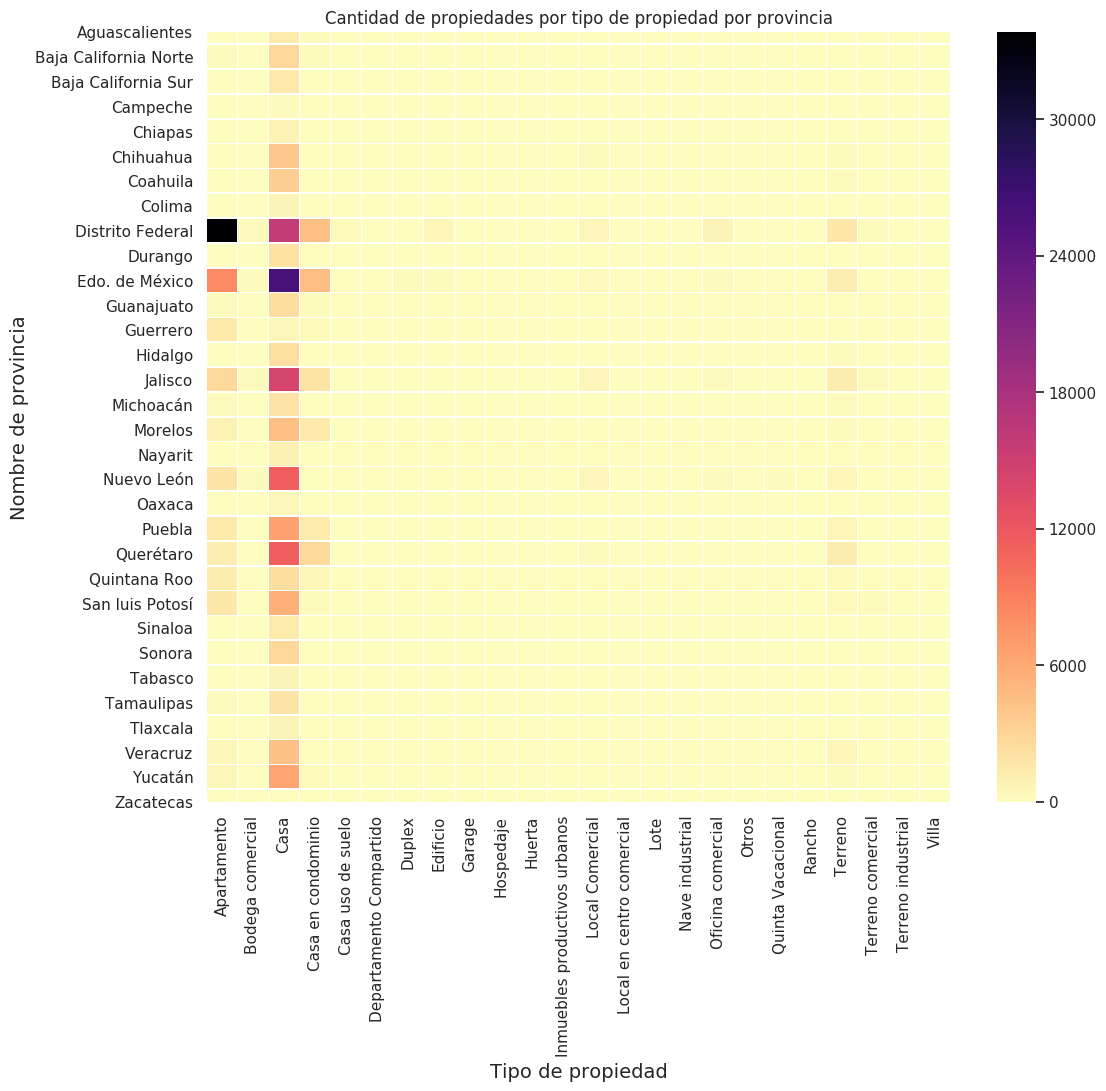

In [80]:
plt.figure(figsize=(12, 10))
g = sns.heatmap(tipos_por_provincia_unstacked, cmap="magma_r", linewidths=0.5)
g.set_title("Cantidad de propiedades por tipo de propiedad por provincia")
g.set_xlabel("Tipo de propiedad", fontsize=14)
g.set_ylabel("Nombre de provincia", fontsize=14)

Text(0, 0.5, 'Nombre de provincia')

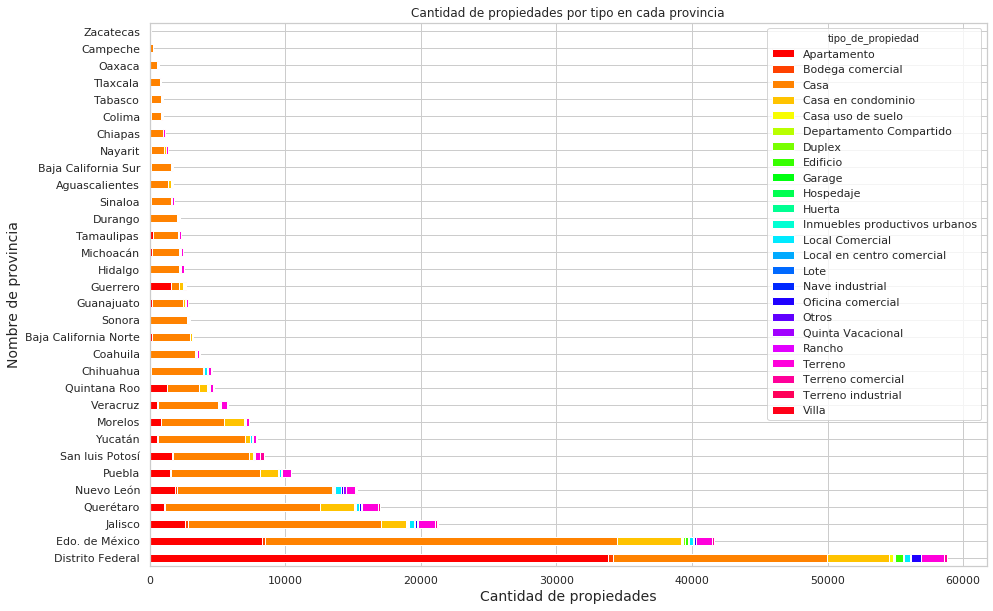

In [80]:
# Otra forma, no se cual es la ideal
tipos_por_provincia_unstacked = tipos_por_provincia_unstacked.assign(total_prop=tipos_por_provincia_unstacked.sum(axis=1))\
                                .sort_values('total_prop', ascending=False).drop('total_prop', axis=1)
g = tipos_por_provincia_unstacked.plot(kind="barh", stacked=True, rot=0, figsize=(15, 10), colormap="hsv", title="Cantidad de propiedades por tipo en cada provincia")
g.set_xlabel("Cantidad de propiedades", fontsize=14)
g.set_ylabel("Nombre de provincia", fontsize=14)

## Analisis del precio

#### Precio promedio de propiedades por provincia

Text(0, 0.5, 'Nombre de provincia')

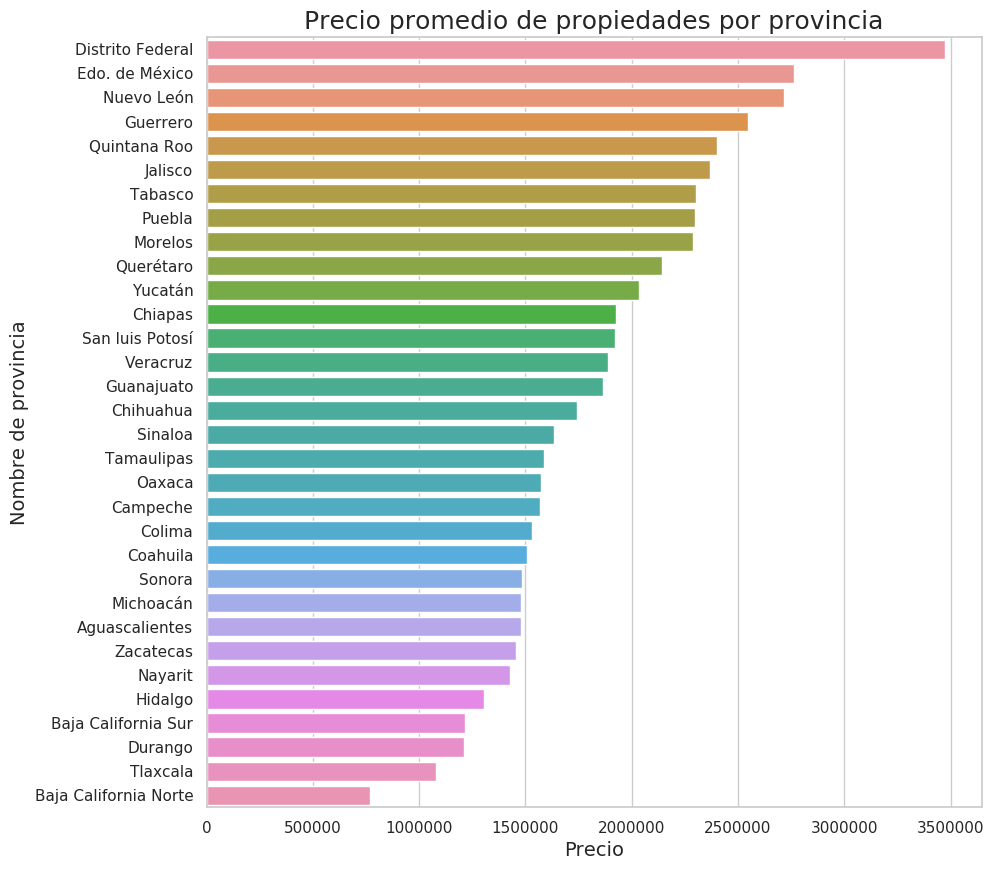

In [82]:
precio_por_provincia = df.groupby("provincia").agg({"precio" : "mean"}).sort_values("precio", ascending=False)
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=precio_por_provincia["precio"].values, y=precio_por_provincia.index, orient="h")
g.set_title("Precio promedio de propiedades por provincia", fontsize=18)
g.set_xlabel("Precio", fontsize=14)
g.set_ylabel("Nombre de provincia", fontsize=14)

#### Precio promedio por tipo de propiedad

Text(0, 0.5, 'Tipo de propiedad')

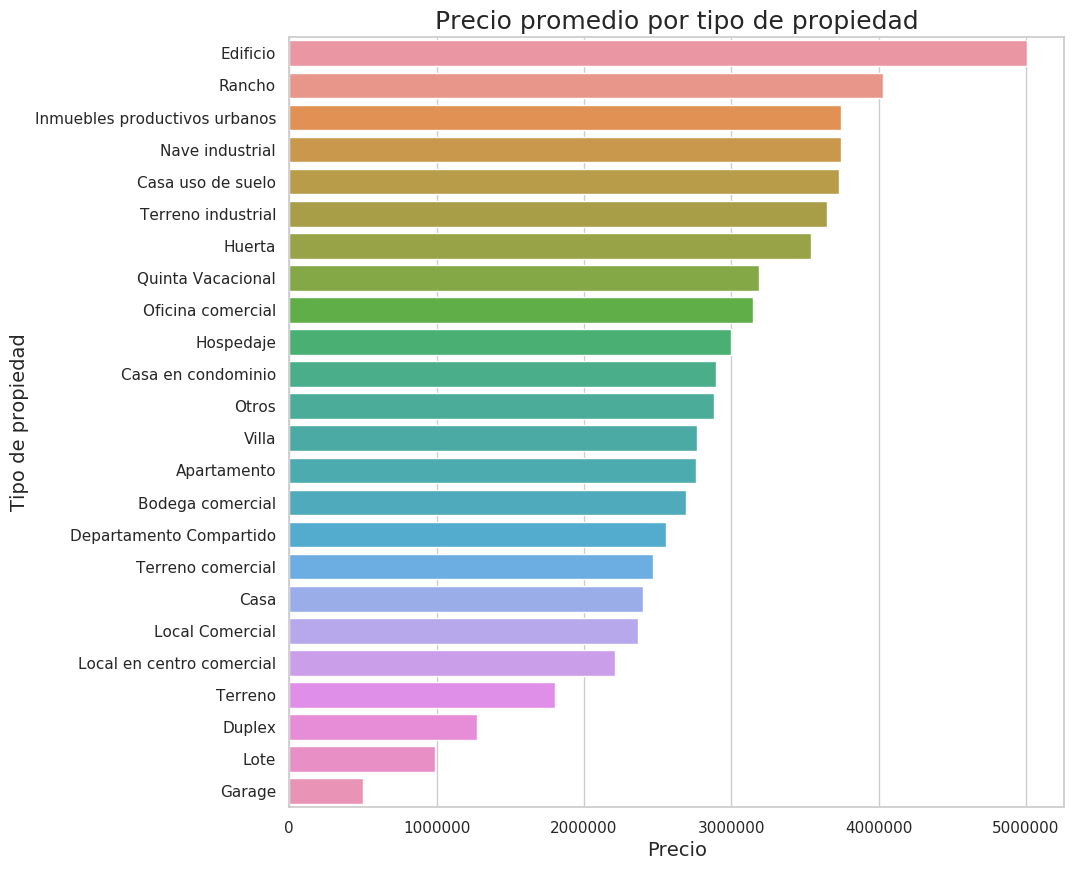

In [83]:
precio_prom_tipo_prop = df.groupby('tipo_de_propiedad').agg({'precio': 'mean'}).sort_values('precio', ascending=False)
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=precio_prom_tipo_prop["precio"].values, y=precio_prom_tipo_prop.index, orient="h")
g.set_title("Precio promedio por tipo de propiedad", fontsize=18)
g.set_xlabel("Precio", fontsize=14)
g.set_ylabel("Tipo de propiedad", fontsize=14)

#### Precio promedio por tipo de propiedad por provincia

In [84]:
precio_prom_por_prop_por_prov = df.groupby(["provincia", "tipo_de_propiedad"]).agg({"precio" : "mean"})
precio_prom_por_prop_por_prov_unstacked = precio_prom_por_prop_por_prov.unstack(level=-1).fillna(0)
precio_prom_por_prop_por_prov_unstacked.head()

precio                       \
tipo_de_propiedad              Apartamento     Bodega comercial   
provincia                                                         
Aguascalientes                1,983,935.28         1,824,285.71   
Baja California Norte         1,031,353.64         1,131,650.00   
Baja California Sur           1,387,353.66         1,275,000.00   
Campeche                      2,755,000.00         5,500,000.00   
Chiapas                         952,988.23         4,043,750.00   

                                                                 \
tipo_de_propiedad                     Casa   Casa en condominio   
provincia                                                         
Aguascalientes                1,411,555.63         1,842,735.34   
Baja California Norte           749,331.40           705,129.23   
Baja California Sur           1,165,893.77         2,007,089.85   
Campeche                      1,460,350.82         1,827,181.82   
Chiapas                       1,914,576.35         1,653,721.50   

                                                                    \
tipo_de_propiedad        Casa uso de suelo Departamento Compartido   
provincia                                                            
Aguascalientes                2,045,000.00                    0.00   
Baja California Norte         1,850,000.00              746,091.40   
Baja California Sur           2,140,000.00                    0.00   
Campeche                        650,000.00                    0.00   
Chiapas                       6,000,000.00                    0.00   

                                                                 \
tipo_de_propiedad                   Duplex             Edificio   
provincia                                                         
Aguascalientes                        0.00         3,858,166.67   
Baja California Norte           654,029.09                 0.00   
Baja California Sur           1,775,000.00         4,620,000.00   
Campeche                              0.00         6,100,000.00   
Chiapas                       1,500,000.00         6,394,230.77   

                                                                 ...  \
tipo_de_propiedad                   Garage            Hospedaje  ...   
provincia                                                        ...   
Aguascalientes                        0.00                 0.00  ...   
Baja California Norte                 0.00                 0.00  ...   
Baja California Sur                   0.00                 0.00  ...   
Campeche                              0.00         3,000,000.00  ...   
Chiapas                               0.00                 0.00  ...   

                                                                 \
tipo_de_propiedad                     Lote      Nave industrial   
provincia                                                         
Aguascalientes                        0.00         1,500,000.00   
Baja California Norte                 0.00         2,816,000.00   
Baja California Sur                   0.00                 0.00   
Campeche                              0.00                 0.00   
Chiapas                               0.00                 0.00   

                                                                 \
tipo_de_propiedad        Oficina comercial                Otros   
provincia                                                         
Aguascalientes                3,093,333.33                 0.00   
Baja California Norte                 0.00                 0.00   
Baja California Sur             357,000.00                 0.00   
Campeche                              0.00                 0.00   
Chiapas                       3,510,000.00                 0.00   

                                                                 \
tipo_de_propiedad        Quinta Vacacional               Rancho   
provincia                                                         
Aguascalient

In [85]:
precio_prom_por_prop_por_prov_unstacked.columns = precio_prom_por_prop_por_prov_unstacked.columns.get_level_values(-1)
precio_prom_por_prop_por_prov_unstacked.head()

tipo_de_propiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Casa uso de suelo,Departamento Compartido,Duplex,Edificio,Garage,Hospedaje,...,Lote,Nave industrial,Oficina comercial,Otros,Quinta Vacacional,Rancho,Terreno,Terreno comercial,Terreno industrial,Villa
provincia,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,"1,983,935.28","1,824,285.71","1,411,555.63","1,842,735.34","2,045,000.00",0.00,0.00,"3,858,166.67",0.00,0.00,...,0.00,"1,500,000.00","3,093,333.33",0.00,"1,782,714.29",0.00,"980,819.14","1,131,710.60",0.00,"2,942,000.00"
Baja California Norte,"1,031,353.64","1,131,650.00","749,331.40","705,129.23","1,850,000.00","746,091.40","654,029.09",0.00,0.00,0.00,...,0.00,"2,816,000.00",0.00,0.00,"2,050,000.00","1,596,666.67","532,429.62","1,954,000.00",0.00,"928,000.00"
Baja California Sur,"1,387,353.66","1,275,000.00","1,165,893.77","2,007,089.85","2,140,000.00",0.00,"1,775,000.00","4,620,000.00",0.00,0.00,...,0.00,0.00,"357,000.00",0.00,"5,500,000.00","1,200,000.00","981,975.29","1,889,450.00",0.00,"850,000.00"
Campeche,"2,755,000.00","5,500,000.00","1,460,350.82","1,827,181.82","650,000.00",0.00,0.00,"6,100,000.00",0.00,"3,000,000.00",...,0.00,0.00,0.00,0.00,"1,700,000.00",0.00,"1,093,561.25","600,000.00",0.00,0.00
Chiapas,"952,988.23","4,043,750.00","1,914,576.35","1,653,721.50","6,000,000.00",0.00,"1,500,000.00","6,394,230.77",0.00,0.00,...,0.00,0.00,"3,510,000.00",0.00,"4,733,333.33","4,844,278.00","1,232,126.25",0.00,0.00,"1,500,000.00"


Text(141.25, 0.5, 'Nombre de provincia')

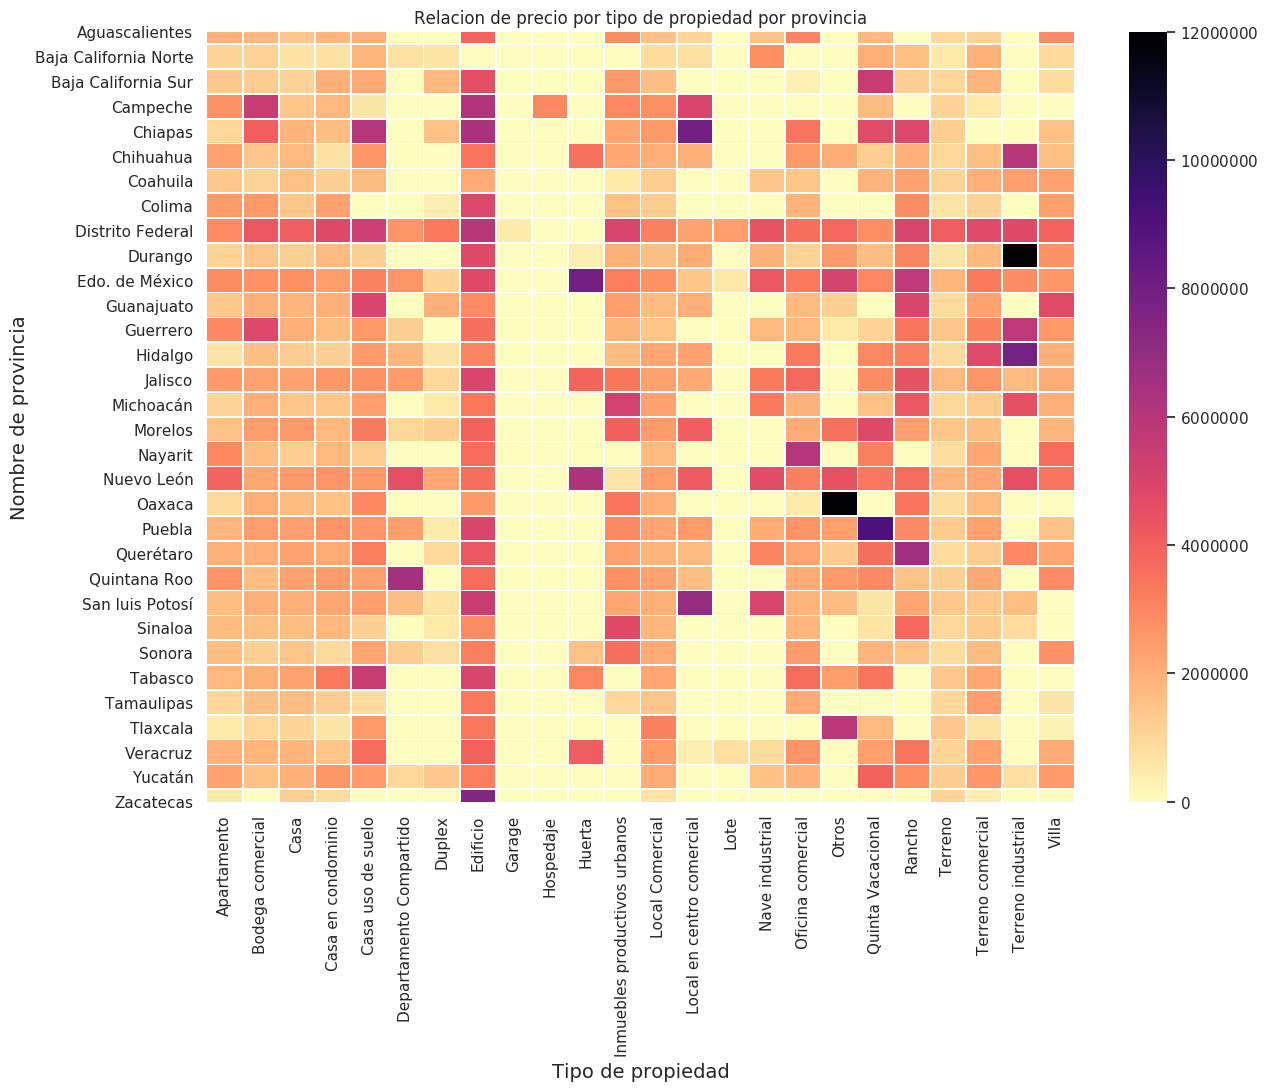

In [86]:
formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)

plt.figure(figsize=(14, 10))
g = sns.heatmap(precio_prom_por_prop_por_prov_unstacked, cmap="magma_r", linewidths=0.5, cbar_kws={"format" : formatter})
g.set_title("Relacion de precio por tipo de propiedad por provincia")
g.set_xlabel("Tipo de propiedad", fontsize=14)
g.set_ylabel("Nombre de provincia", fontsize=14)

## Analisis de propiedades a nivel temporal

#### Cantidad de publicaciones por anio

In [58]:
# Agrego columna con anio y mes para facilitar operaciones, considerando que no hay NULLs en el atributo 'fecha'
df["anio"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month
df.head()

,titulo,descripcion,tipo_de_propiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,lng,fecha,gimnasio,usos_multiples,piscina,escuelas_cercanas,centros_comerciales_cercanos,precio,anio,mes
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,"2,273,000.00",2015,8
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,"3,600,000.00",2013,6
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,...,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,"1,200,000.00",2015,10
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,...,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,"650,000.00",2012,3
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,...,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,"1,150,000.00",2016,6


In [59]:
propiedades_por_anio = df.groupby("anio").agg({"anio" : "count"})
propiedades_por_anio.columns = ["cantidad_de_publicaciones"]
propiedades_por_anio.sort_values("cantidad_de_publicaciones")
propiedades_por_anio

,cantidad_de_publicaciones
anio,
2012,23534
2013,30386
2014,40572
2015,51470
2016,94038


Text(0, 0.5, 'Cantidad de publicaciones')

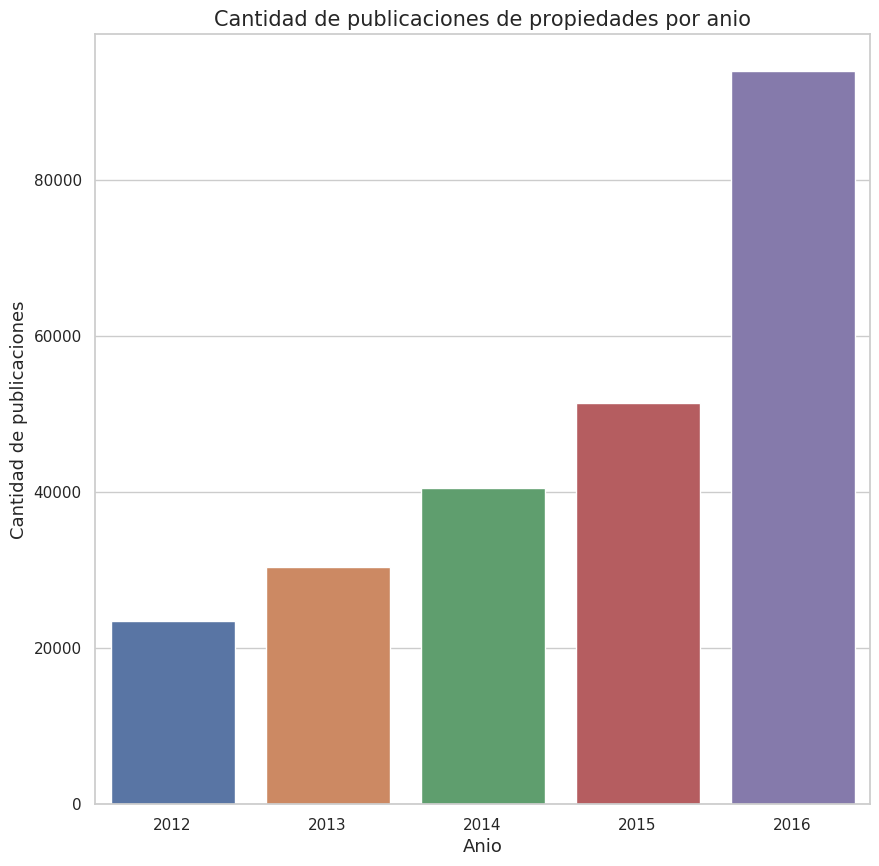

In [60]:
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=propiedades_por_anio.index, y=propiedades_por_anio["cantidad_de_publicaciones"].values)
g.set_title("Cantidad de publicaciones de propiedades por anio", fontsize=15)
g.set_xlabel("Anio", fontsize=13)
g.set_ylabel("Cantidad de publicaciones", fontsize=13)

#### Cantidad de publicaciones por anio por tipo de propiedad

Text(0, 0.5, 'Cantidad de publicaciones')

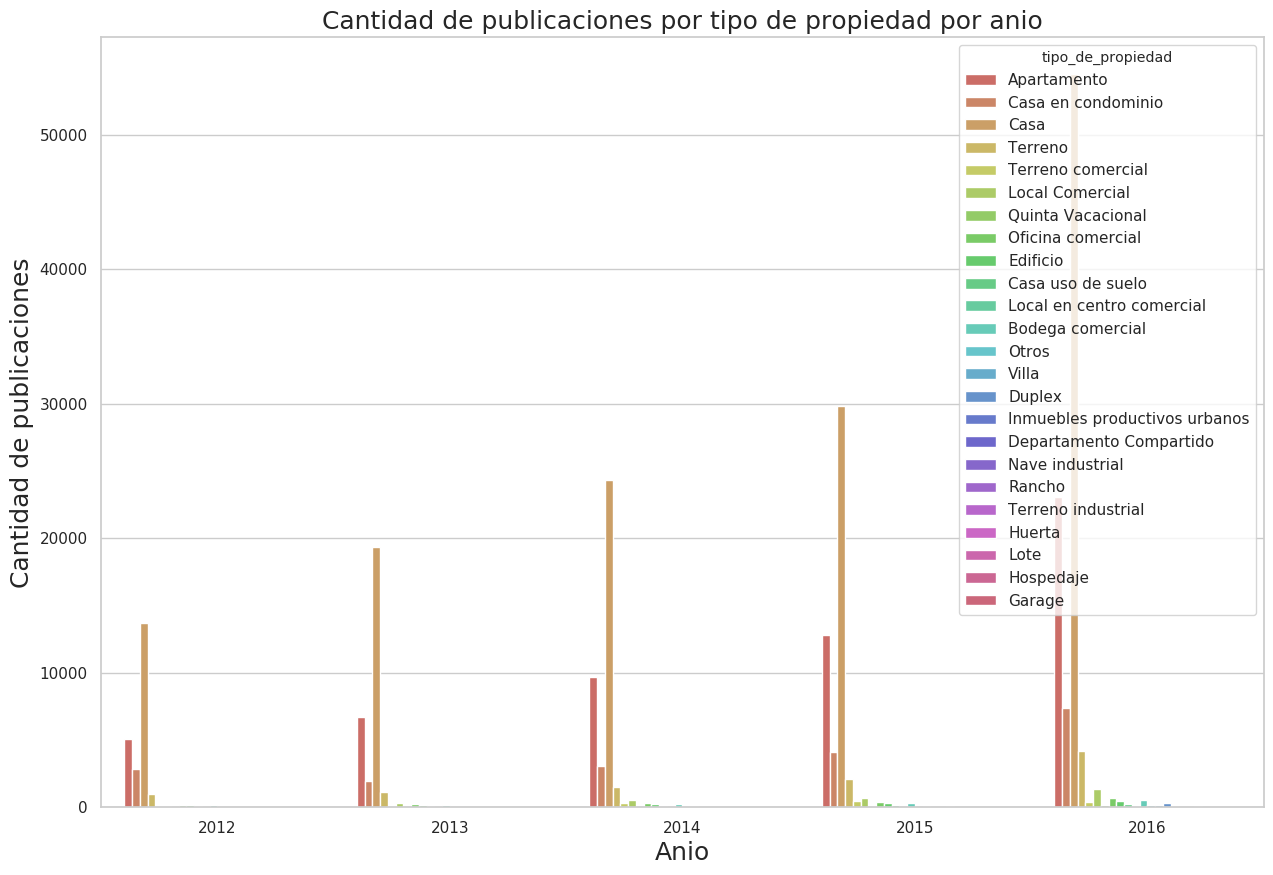

In [61]:
# Esto me quedo medio feo, tengo que ver si hay alguna manera de mostrar lo mismo mas lindo o separar el grafico en varias partes
plt.subplots(figsize=(15, 10))
g = sns.countplot(x="anio", hue="tipo_de_propiedad", data=df, palette="hls")
g.set_title("Cantidad de publicaciones por tipo de propiedad por anio", fontsize=18)
g.set_xlabel("Anio", fontsize=18)
g.set_ylabel("Cantidad de publicaciones", fontsize=18)

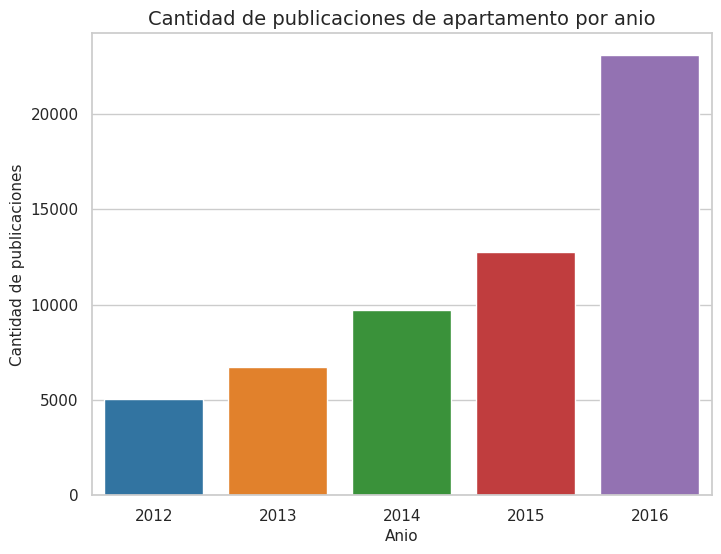

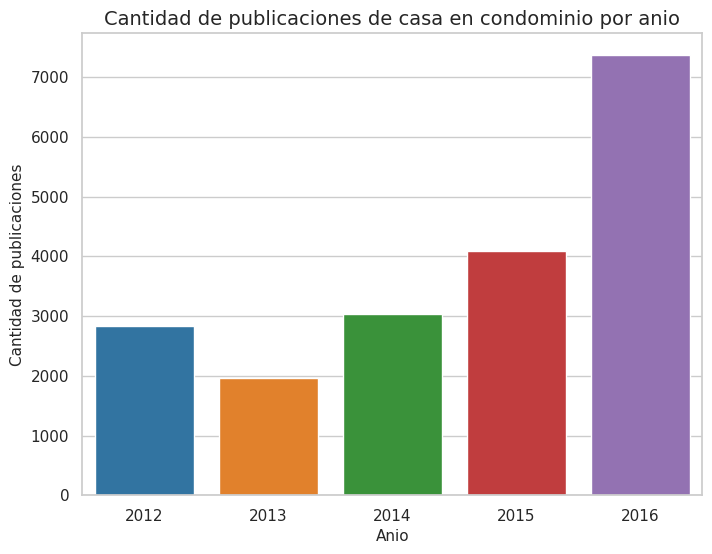

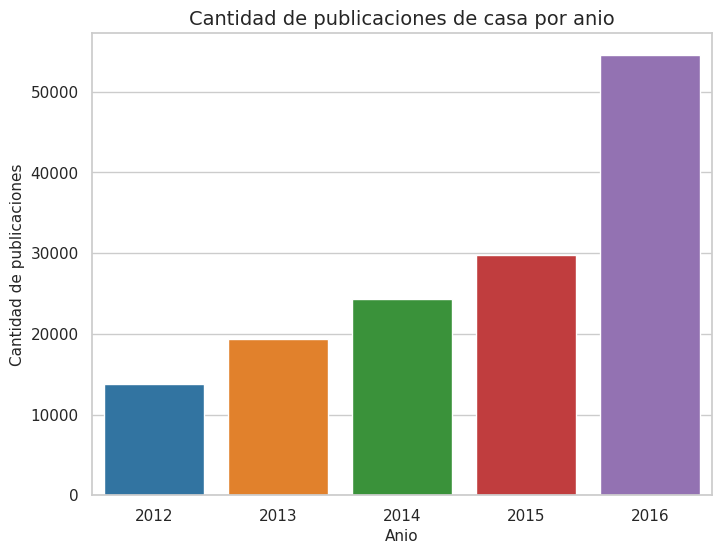

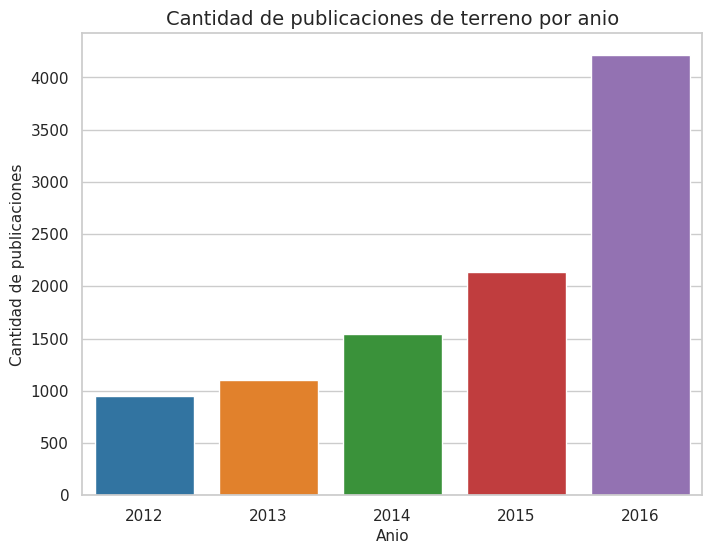

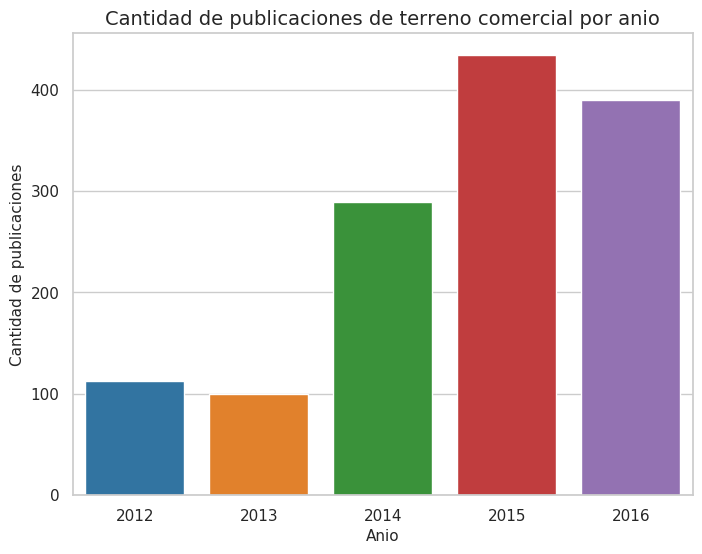

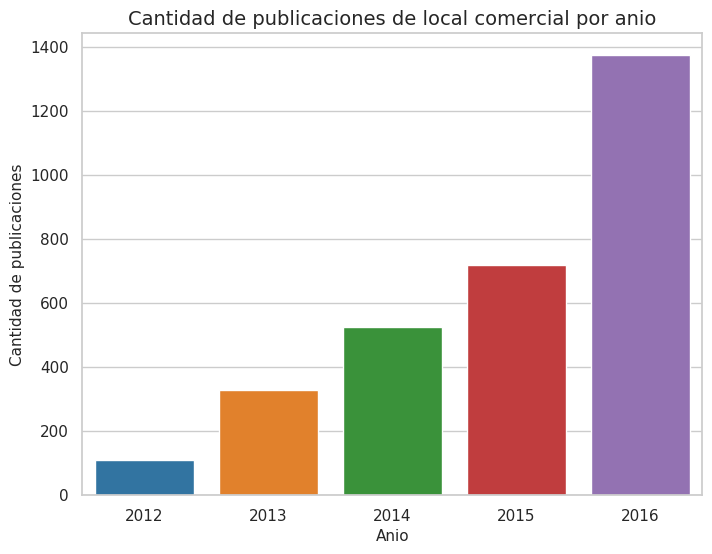

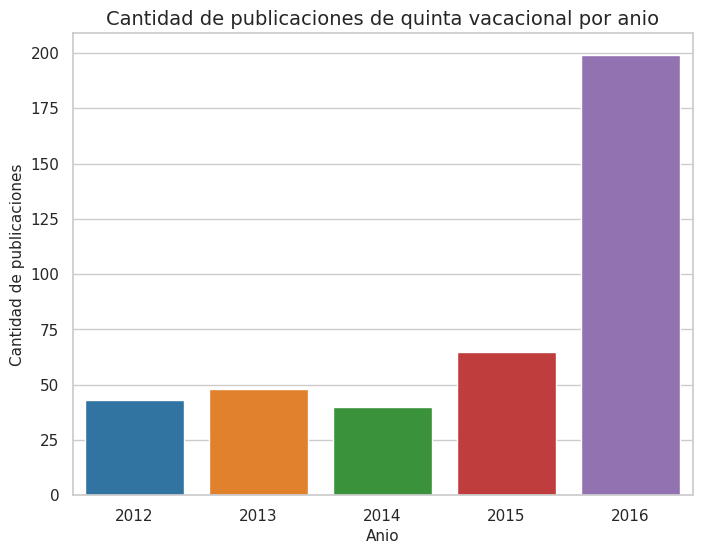

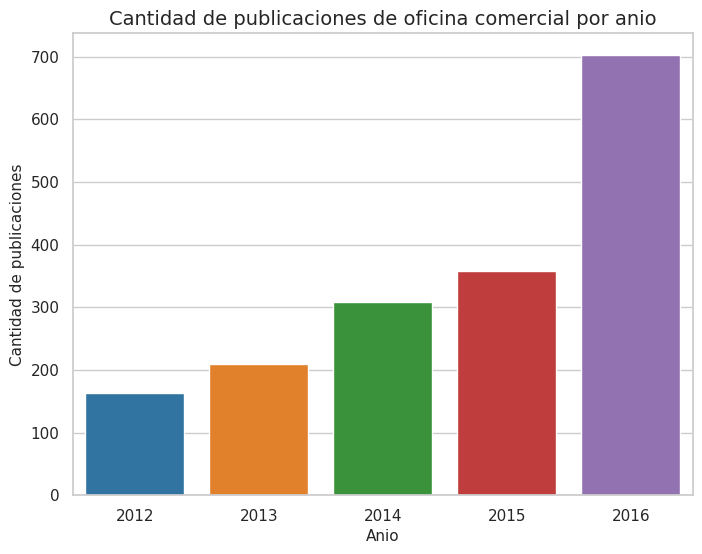

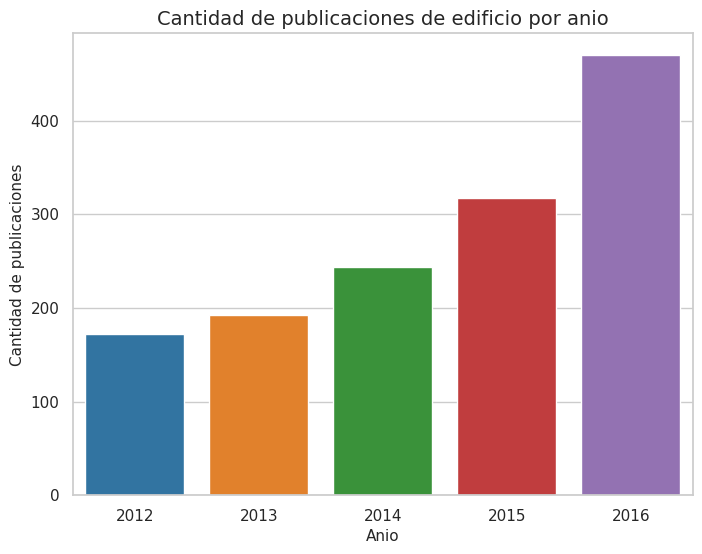

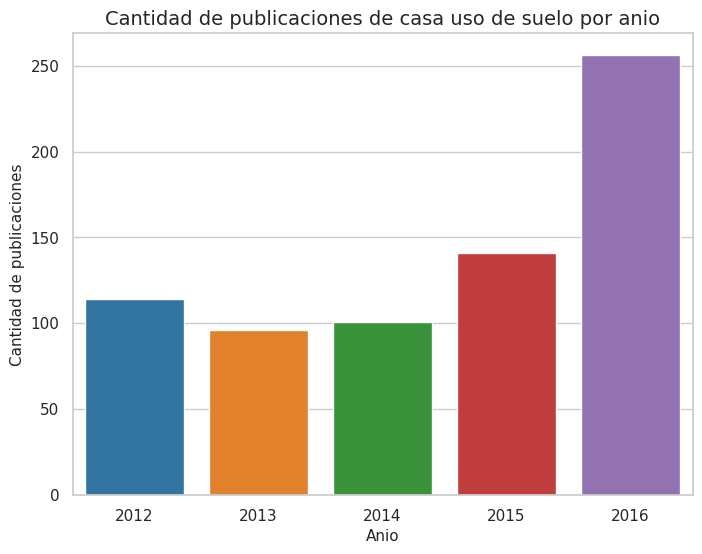

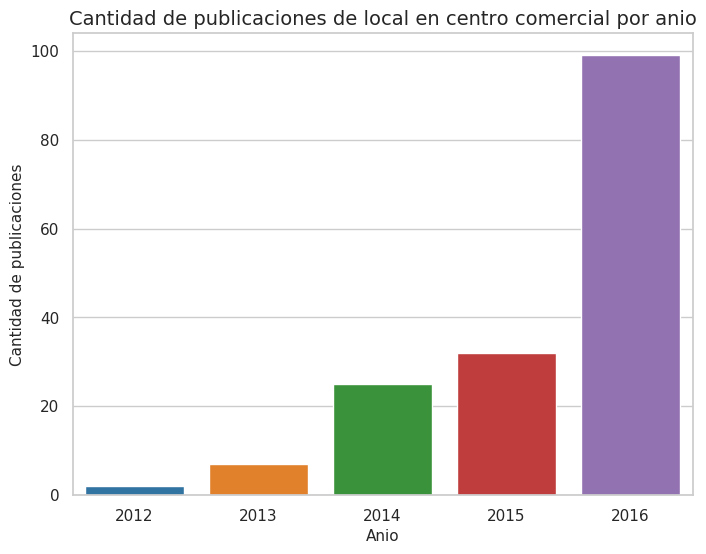

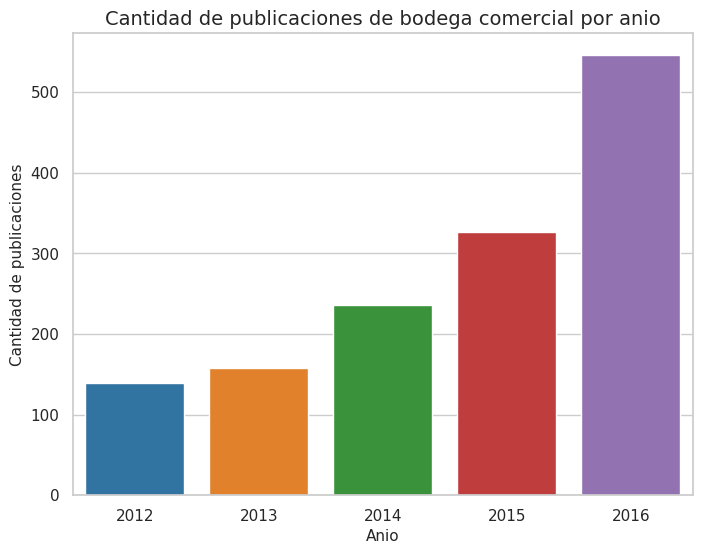

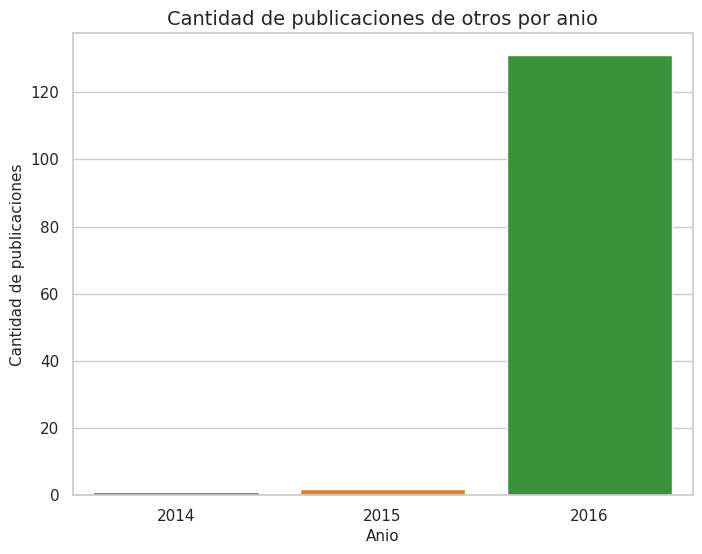

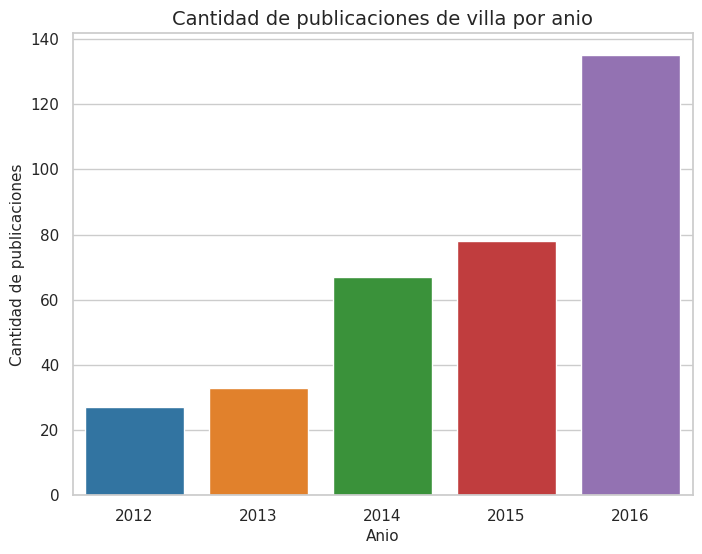

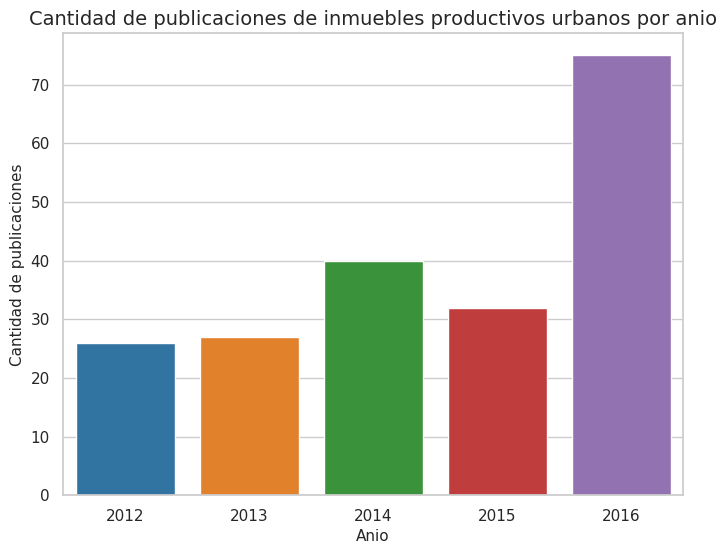

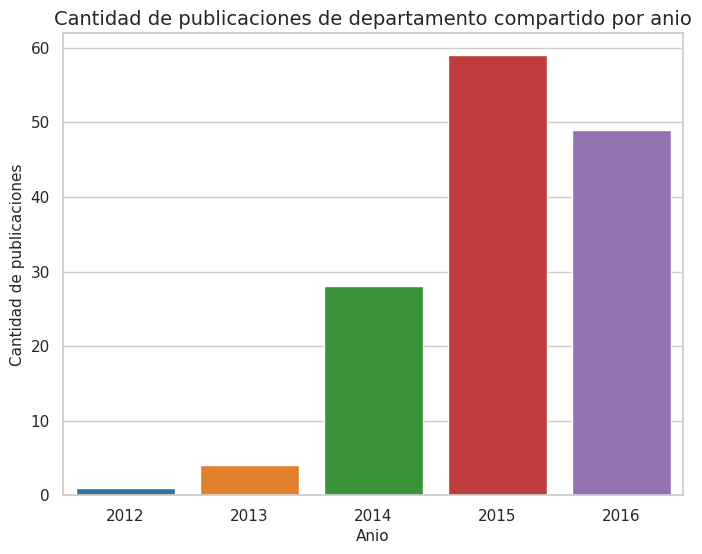

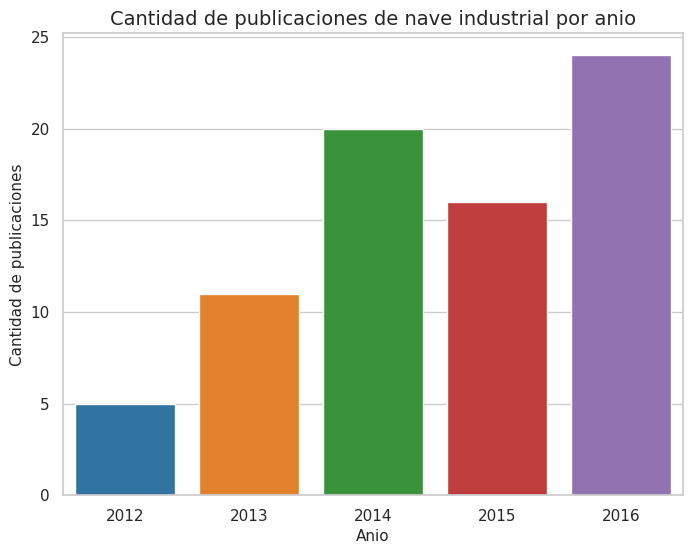

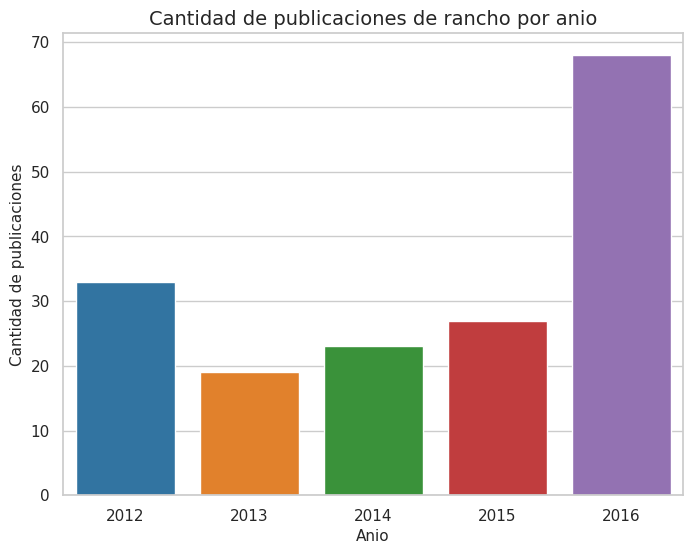

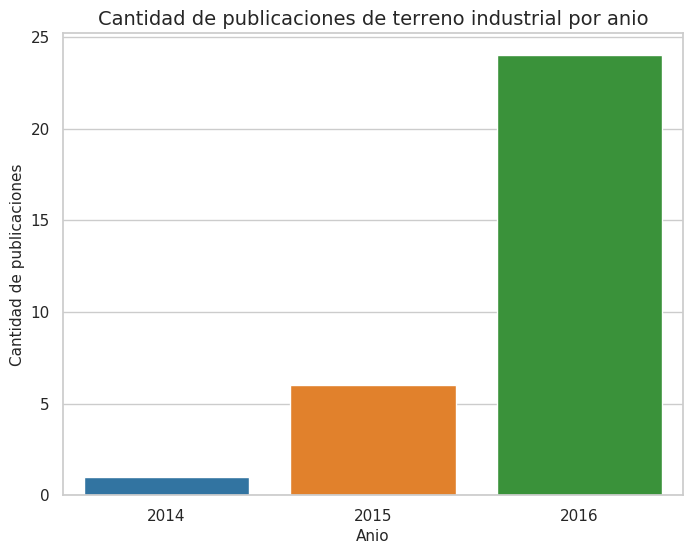

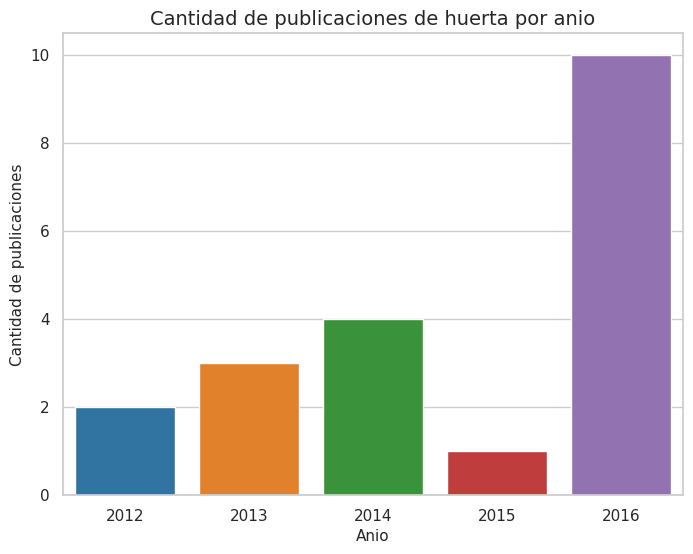

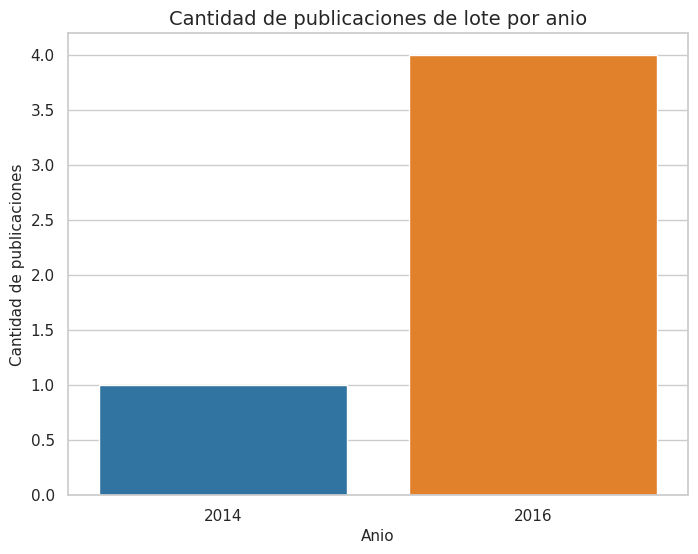

In [101]:
# Version iterativa para graficos individuales
for tipo in df["tipo_de_propiedad"].unique():
    # Descarto Hospedaje, Garage y Duplex y NaN por no haber datos suficentes
    if pd.isnull(tipo) or tipo in ["Hospedaje", "Garage", "Duplex"]:
        continue
    plt.subplots(figsize=(8, 6))
    g = sns.countplot(x="anio", data=df.loc[df["tipo_de_propiedad"] == tipo, :], palette="tab10")
    g.set_title("Cantidad de publicaciones de " + tipo.lower() + " por anio", fontsize=14)
    g.set_xlabel("Anio", fontsize=11)
    g.set_ylabel("Cantidad de publicaciones", fontsize=11)

#### Cantidad de publicaciones por anio y mes

In [64]:
cant_publicaciones_anio_mes = df.groupby(["anio", "mes"]).agg({"mes" : "count"})
cant_publicaciones_anio_mes.head()

mes
anio mes      
2012 1    1528
     2    1327
     3    1103
     4    1434
     5    1857

In [65]:
cant_publicaciones_anio_mes_unstacked = cant_publicaciones_anio_mes.unstack(level=-1)
cant_publicaciones_anio_mes_unstacked.columns = cant_publicaciones_anio_mes_unstacked.columns.get_level_values(-1)
cant_publicaciones_anio_mes_unstacked.head()

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2012,1528,1327,1103,1434,1857,1524,1973,3971,2598,3161,1608,1450
2013,1993,1401,1734,1829,2000,2016,2524,2374,3321,4056,4012,3126
2014,2403,2534,2916,2780,3071,3082,3125,3583,3911,3811,4613,4743
2015,4310,3869,3957,3783,3696,3804,3875,4526,4863,5552,4906,4329
2016,5775,4592,5022,6640,5438,6795,6013,6443,5929,6726,6086,28579


Text(116.24999999999999, 0.5, 'Anio')

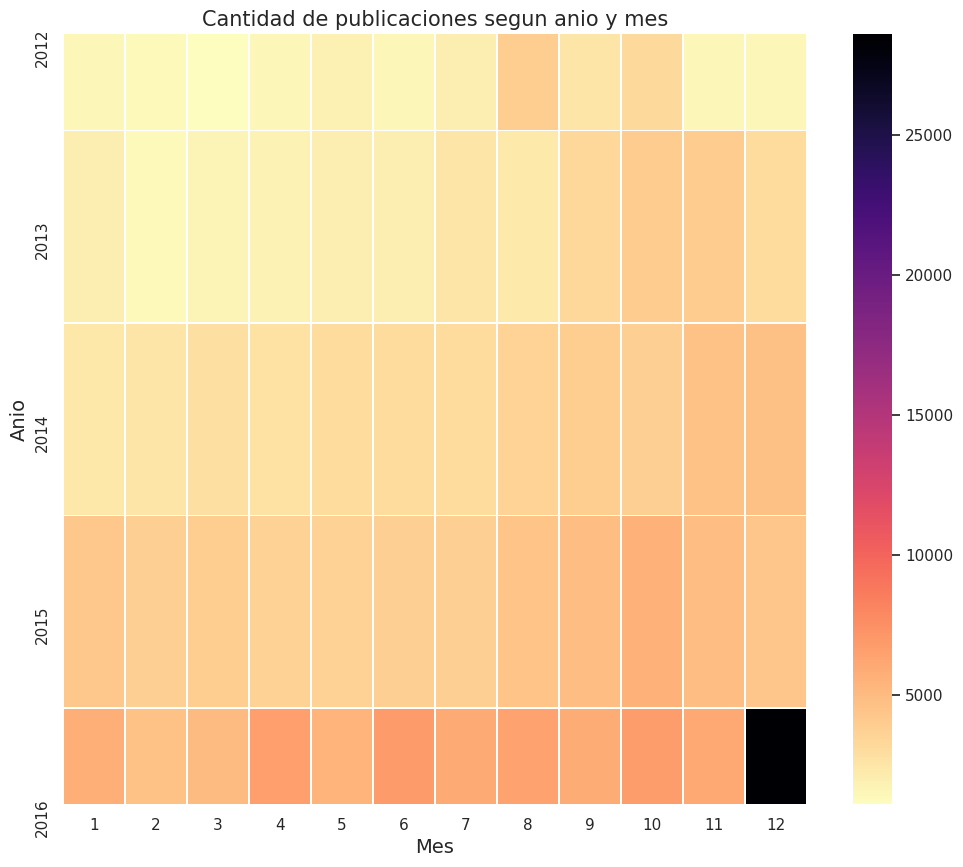

In [66]:
plt.figure(figsize=(12, 10))
g = sns.heatmap(cant_publicaciones_anio_mes_unstacked, cmap="magma_r", linewidths=0.5)
g.set_title("Cantidad de publicaciones segun anio y mes", fontsize=15)
g.set_xlabel("Mes", fontsize=14)
g.set_ylabel("Anio", fontsize=14)

#### Promedio de precio de propiedades segun mes y anio

In [67]:
precio_por_mes_anio = df.groupby(["anio", "mes"]).agg({"precio" : "mean"})
precio_por_mes_anio.head()

precio
anio mes                     
2012 1           1,910,287.35
     2           1,817,814.98
     3           1,966,355.14
     4           2,167,271.07
     5           1,899,123.96

In [68]:
precio_por_mes_anio_unstacked = precio_por_mes_anio.unstack(level=-1)
precio_por_mes_anio_unstacked.columns = precio_por_mes_anio_unstacked.columns.get_level_values(-1)
precio_por_mes_anio_unstacked.head()

mes,1,2,3,4,5,6,7,8,9,10,11,12
anio,,,,,,,,,,,,
2012,"1,910,287.35","1,817,814.98","1,966,355.14","2,167,271.07","1,899,123.96","1,930,387.50","1,827,298.64","2,116,829.44","2,092,779.60","2,228,156.79","2,188,356.60","1,894,107.71"
2013,"2,032,821.20","2,158,046.25","2,092,787.90","2,164,533.34","2,119,536.03","2,058,967.85","2,221,330.79","2,197,107.92","2,112,627.39","2,178,858.70","2,082,400.55","2,075,765.19"
2014,"2,194,886.65","2,327,648.59","2,268,508.58","2,360,990.84","2,312,619.62","2,357,716.97","2,358,129.60","2,345,645.65","2,430,108.50","2,262,678.24","2,429,326.67","2,553,107.23"
2015,"2,399,791.18","2,367,703.88","2,602,793.96","2,520,665.66","2,643,570.46","2,734,103.95","2,779,177.46","2,654,494.03","2,778,323.67","2,712,010.14","2,744,395.71","2,604,719.23"
2016,"2,688,369.65","2,695,539.53","2,807,389.07","2,827,182.84","2,726,719.66","2,744,906.10","2,882,329.84","2,880,278.12","2,918,303.51","2,825,196.14","2,824,474.06","2,792,976.58"


Text(116.24999999999999, 0.5, 'Anio')

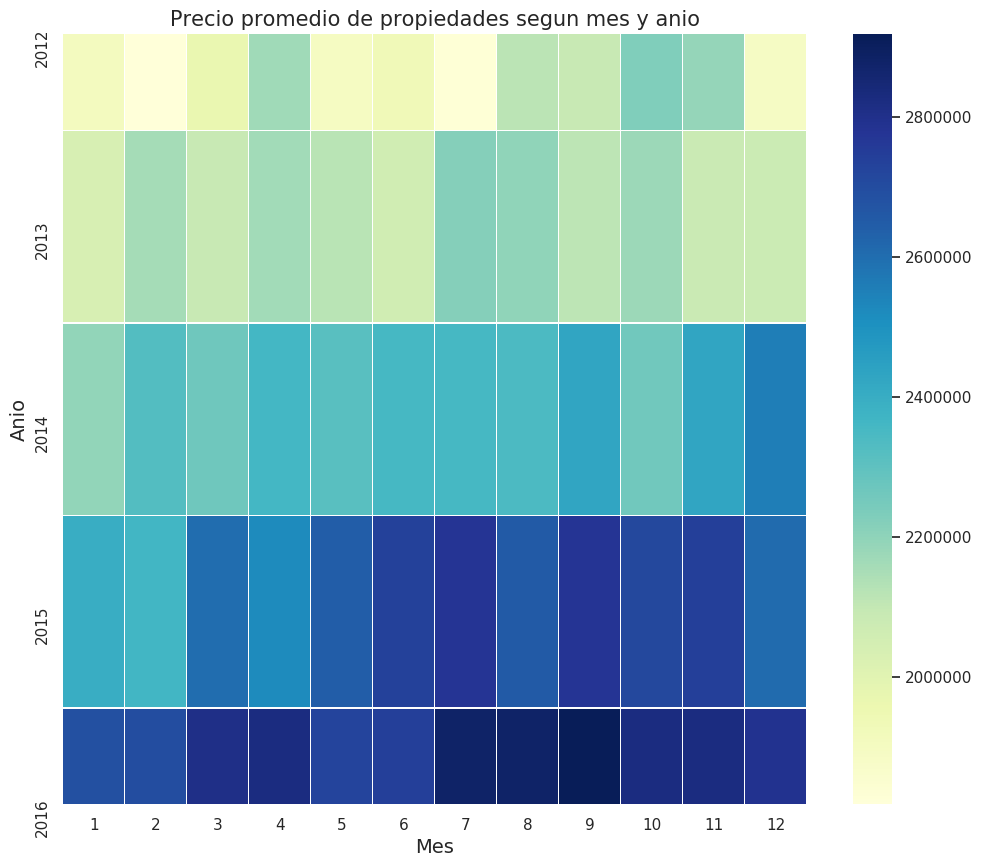

In [69]:
plt.figure(figsize=(12, 10))
g = sns.heatmap(precio_por_mes_anio_unstacked, cmap="YlGnBu", linewidths=0.25)
g.set_title("Precio promedio de propiedades segun mes y anio", fontsize=15)
g.set_xlabel("Mes", fontsize=14)
g.set_ylabel("Anio", fontsize=14)

#### Precio promedio de tipo de propiedades segun anio

La idea era comparar la variacion de precios de cada propiedad a lo largo de los anios, a simple vista los bar plots parecen servir, pero desconozco si hay una manera
mejor de visualizar lo mismo.

In [70]:
precio_por_prop_anio = df.groupby(["tipo_de_propiedad", "anio"]).agg({"precio" : "mean"})
precio_por_prop_anio.head()

precio
tipo_de_propiedad anio                     
Apartamento       2012         1,895,031.69
                  2013         2,219,234.60
                  2014         2,429,907.17
                  2015         2,965,421.26
                  2016         3,141,785.85

In [71]:
precio_por_prop_anio_reshaped = precio_por_prop_anio.reset_index()
precio_por_prop_anio_reshaped.head()

,tipo_de_propiedad,anio,precio
0,Apartamento,2012,"1,895,031.69"
1,Apartamento,2013,"2,219,234.60"
2,Apartamento,2014,"2,429,907.17"
3,Apartamento,2015,"2,965,421.26"
4,Apartamento,2016,"3,141,785.85"


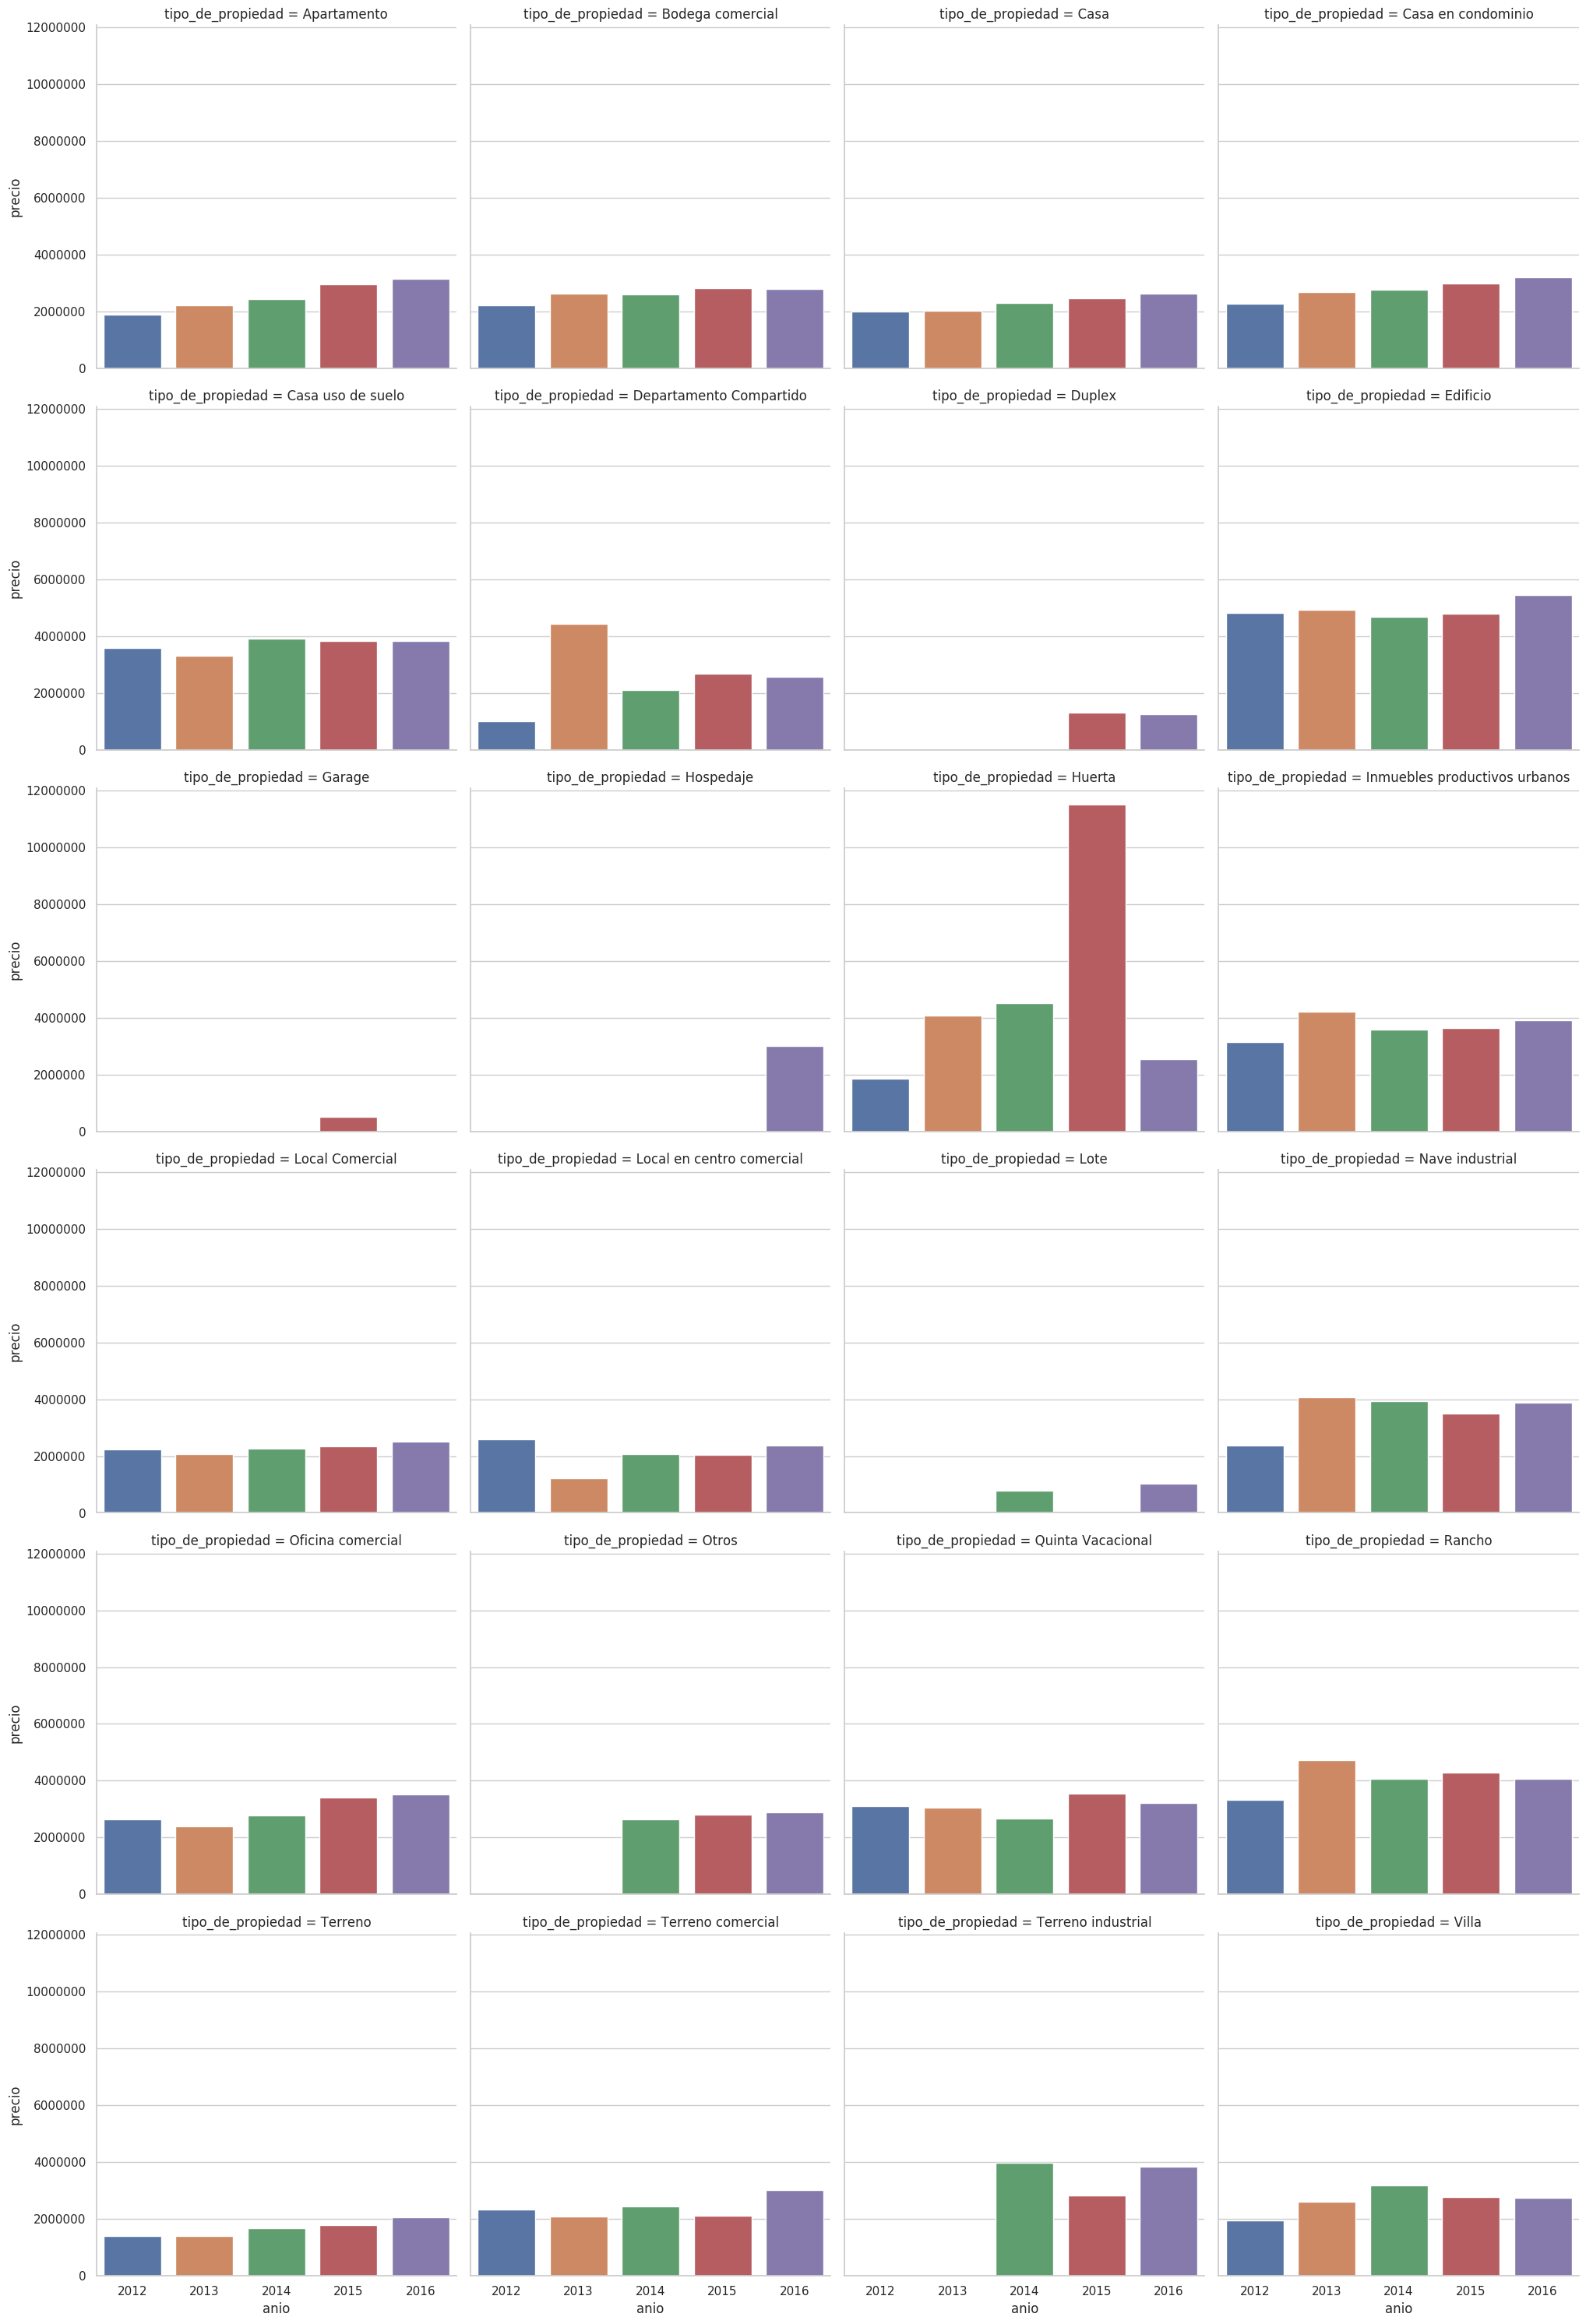

In [72]:
g = sns.catplot(x="anio", col="tipo_de_propiedad", y="precio", data=precio_por_prop_anio_reshaped, kind="bar", col_wrap=4)
plt.ticklabel_format(style='plain', axis='y')

## Analisis a nivel de propiedades segun atributos

#### Porcentaje de propiedades con distinta cantidad de banios

In [73]:
porcentaje_de_prop_banios = df["banos"].value_counts(normalize=True)
porcentaje_de_prop_banios.rename(index={2.00:"2 banios", 1.00:"1 banio", 3.00:"3 banios", 4.00:"4 banios"}, inplace=True)
porcentaje_de_prop_banios

2 banios                   0.41
1 banio                    0.27
3 banios                   0.23
4 banios                   0.09
Name: banos, dtype: float64

Text(0.5, 1.0, 'Porcentaje de propiedades segun cantidad de banios')

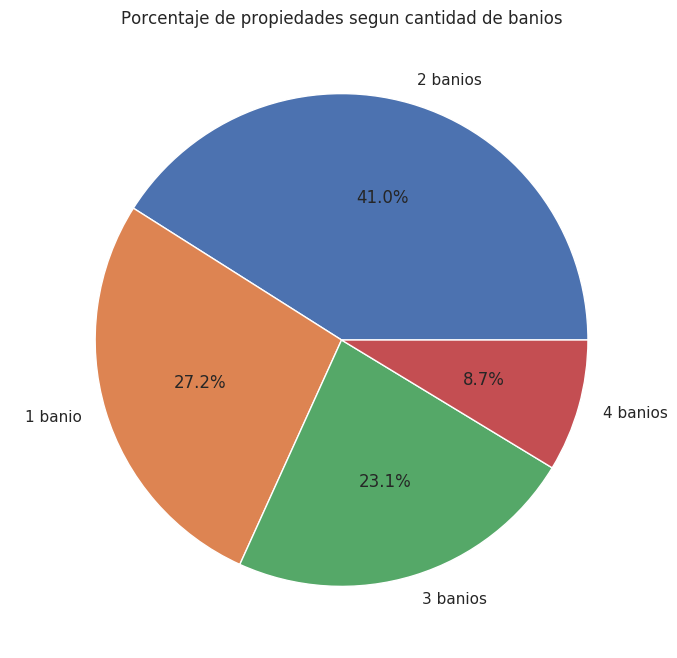

In [74]:
g = porcentaje_de_prop_banios.plot.pie(figsize=(8, 8), autopct='%1.1f%%', label=' ')
g.set_title("Porcentaje de propiedades segun cantidad de banios")

#### Porcentaje de propiedades con distinta garages

In [75]:
porcentaje_de_prop_garages = df["garages"].value_counts(normalize=True)
porcentaje_de_prop_garages.rename(index={2.00 : "2 garages", 1.00 : "1 garage", 0.00 : "0 garage", 3.00 : "3 garages"}, inplace=True)
porcentaje_de_prop_garages

2 garages                   0.47
1 garage                    0.29
0 garage                    0.13
3 garages                   0.11
Name: garages, dtype: float64

Text(0.5, 1.0, 'Porcentaje de propiedades segun cantidad de garages')

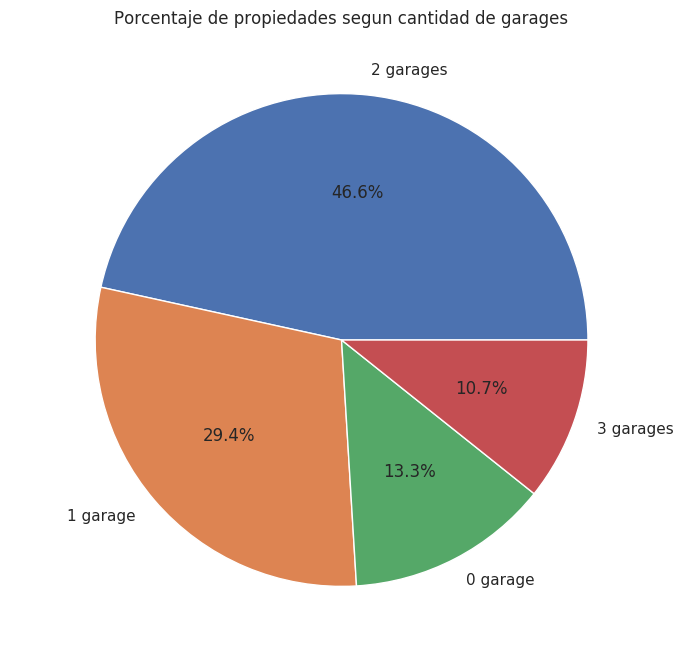

In [76]:
g = porcentaje_de_prop_garages.plot.pie(figsize=(8, 8), autopct='%1.1f%%', label=' ')
g.set_title("Porcentaje de propiedades segun cantidad de garages")

#### Cantidad de propiedades segun la cantidad de habitaciones

In [77]:
cant_prop_segun_habitaciones = df["habitaciones"].value_counts().rename(index={1.00:1, 2.00:2, 3.00:3, 4.00:4, 5.00:5, 6.00:6, 7.00:7,\
                                               8.00:8, 9.00:9, 10.00:10})
cant_prop_segun_habitaciones.sort_values()

9        179
10       316
8        398
7        539
6       1669
5       4596
1       5069
4      25068
2      57808
3     121887
Name: habitaciones, dtype: int64

Text(0, 0.5, 'Cantidad de propiedades')

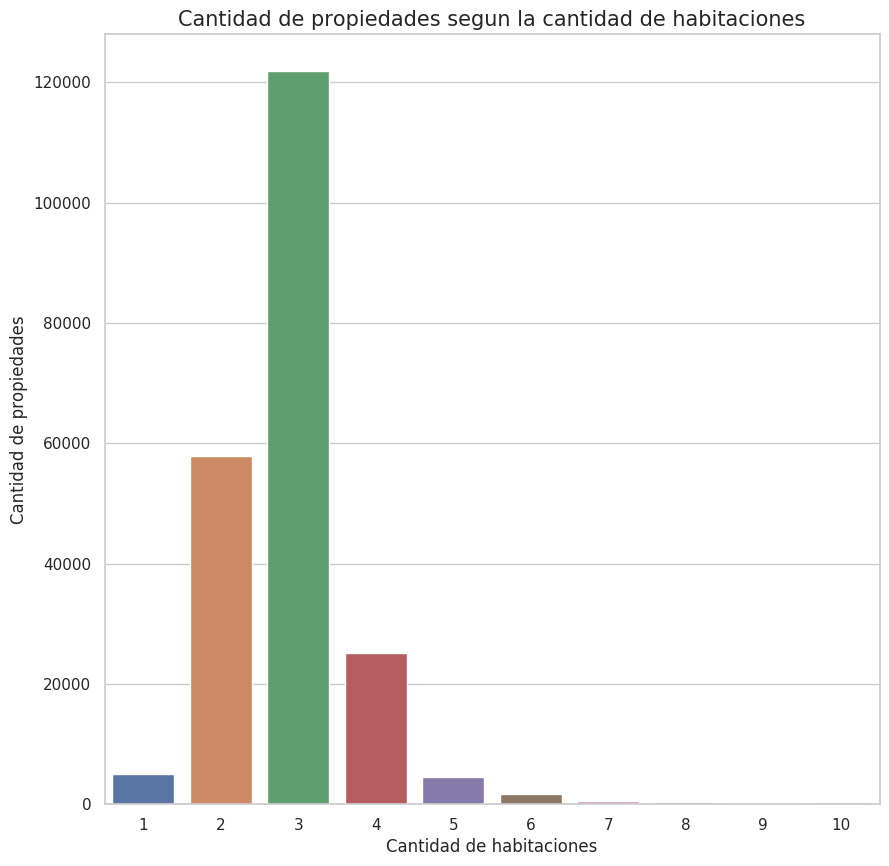

In [78]:
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=cant_prop_segun_habitaciones.index, y=cant_prop_segun_habitaciones.values)
g.set_title("Cantidad de propiedades segun la cantidad de habitaciones", fontsize=15)
g.set_xlabel("Cantidad de habitaciones", fontsize=12)
g.set_ylabel("Cantidad de propiedades", fontsize=12)

#### Cantidad de propiedades segun metros totales cubiertos

Text(0, 0.5, 'Cantidad de propiedades')

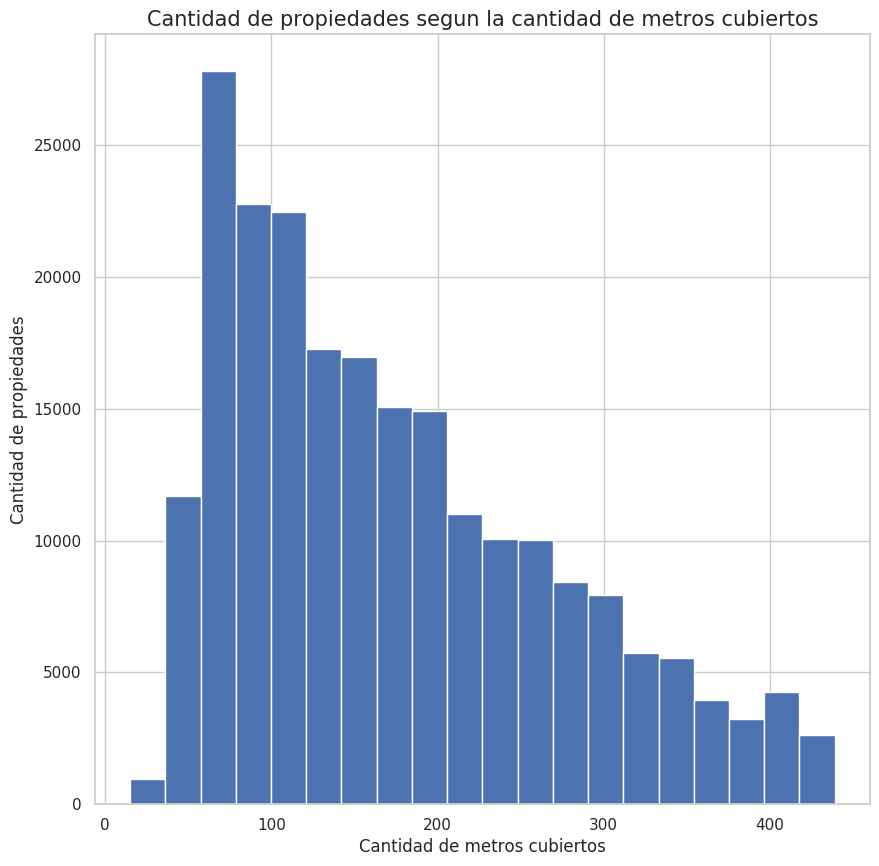

In [79]:
g = df[["metros_cubiertos"]].plot.hist(bins=20, figsize=(10, 10), legend=False)
g.set_title("Cantidad de propiedades segun la cantidad de metros cubiertos", fontsize=15)
g.set_xlabel("Cantidad de metros cubiertos", fontsize=12)
g.set_ylabel("Cantidad de propiedades", fontsize=12)

#### Precio vs. metros totales

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


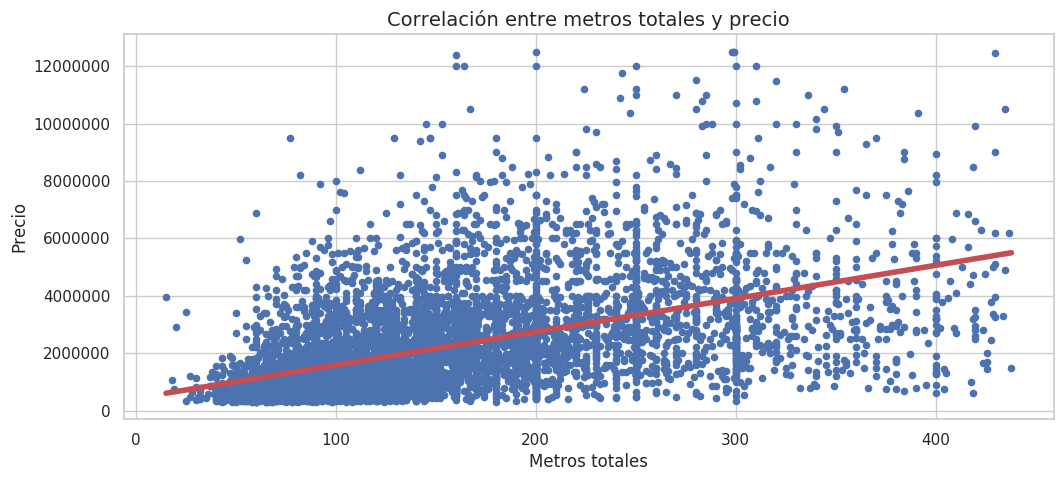

In [80]:
df_sample = df.sample(frac=0.15).copy().dropna().sort_values("metros_totales")
g = df_sample.plot.scatter(x="metros_totales", y="precio", figsize=(12, 5))
g.set_title("Correlación entre metros totales y precio", fontsize=14)
g.set_xlabel("Metros totales", fontsize=12)
g.set_ylabel("Precio", fontsize=12)
plt.ticklabel_format(style='plain')

x = df_sample["metros_totales"]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=4);

#### Precio promedio segun cantidad de habitaciones

In [81]:
precio_segun_habitaciones = df.groupby("habitaciones").agg({"precio" : "mean"})
precio_segun_habitaciones.rename(index={1.00:1, 2.00:2, 3.00:3, 4.00:4, 5.00:5, 6.00:6, 7.00:7,\
                                               8.00:8, 9.00:9, 10.00:10}, inplace=True)
precio_segun_habitaciones

,precio
habitaciones,
1,"1,806,074.64"
2,"1,616,899.96"
3,"2,769,606.78"
4,"3,494,388.63"
5,"3,284,971.94"
6,"3,165,558.67"
7,"3,562,563.99"
8,"3,432,464.06"
9,"3,936,173.91"


Text(0, 0.5, 'Precio')

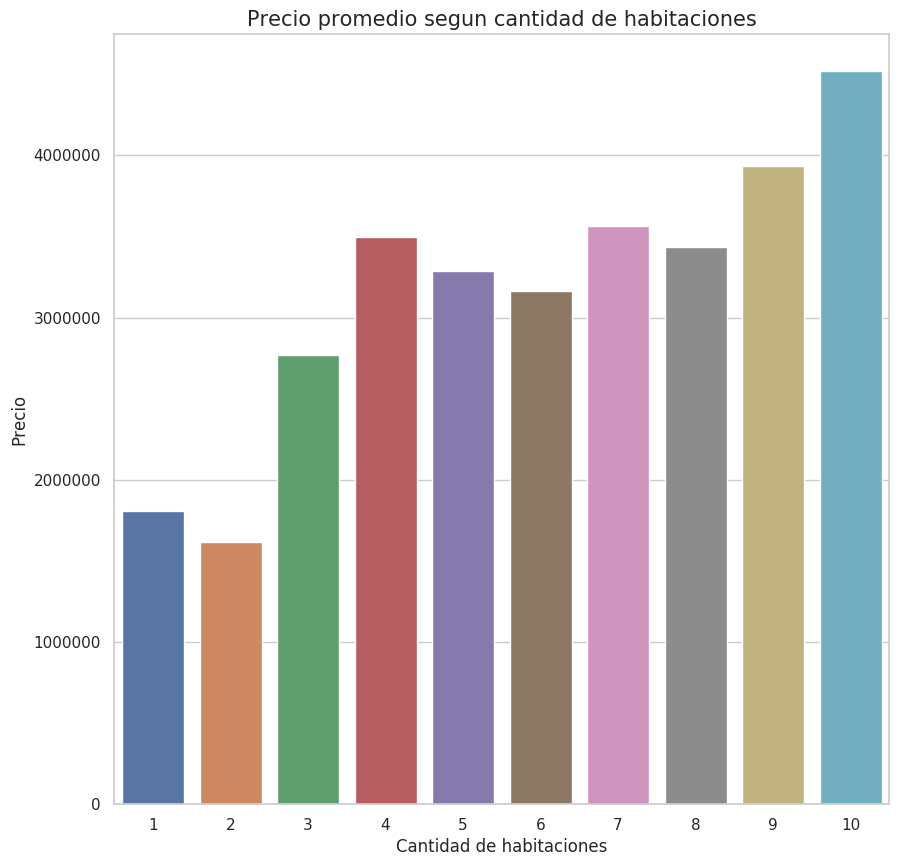

In [82]:
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=precio_segun_habitaciones.index, y=precio_segun_habitaciones["precio"].values)
g.set_title("Precio promedio segun cantidad de habitaciones", fontsize=15)
g.set_xlabel("Cantidad de habitaciones", fontsize=12)
g.set_ylabel("Precio", fontsize=12)

#### Precio promedio segun cantidad de banios

In [83]:
precio_segun_banios = df.groupby("banos").agg({"precio" : "mean"})
precio_segun_banios.rename(index={1.00:1, 2.00:2, 3.00:3, 4.00:4}, inplace=True)
precio_segun_banios

,precio
banos,
1,"1,041,801.51"
2,"2,317,529.62"
3,"3,701,016.76"
4,"4,449,123.21"


Text(0, 0.5, 'Precio')

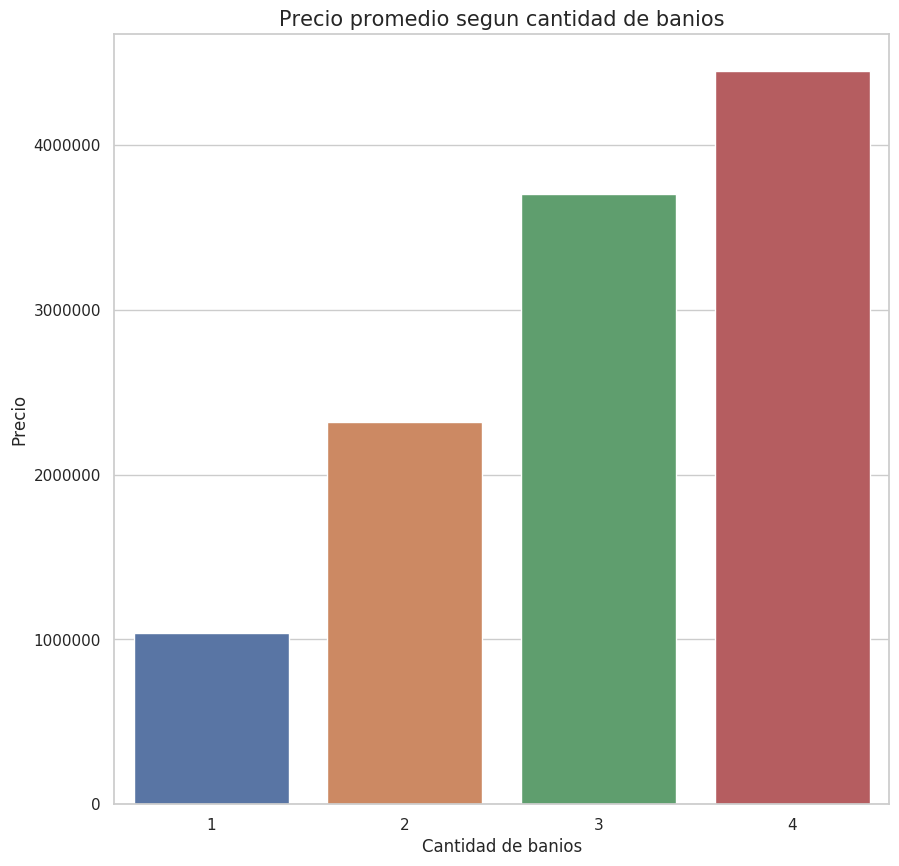

In [84]:
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=precio_segun_banios.index, y=precio_segun_banios["precio"].values)
g.set_title("Precio promedio segun cantidad de banios", fontsize=15)
g.set_xlabel("Cantidad de banios", fontsize=12)
g.set_ylabel("Precio", fontsize=12)

#### Precio promedio segun cantidad de banios y habitaciones en conjunto

In [85]:
precio_por_habitaciones_banios = df.groupby(["habitaciones", "banos"]).agg({"precio" : "mean"})
precio_por_habitaciones_banios.head()

precio
habitaciones banos                     
1.00         1.00          1,666,180.00
             2.00          2,597,320.68
             3.00          3,047,855.75
             4.00          3,908,000.00
2.00         1.00            846,093.77

In [86]:
precio_por_habitaciones_banios_unstacked = precio_por_habitaciones_banios.unstack(level=-1)
precio_por_habitaciones_banios_unstacked.columns = [1, 2, 3, 4]
precio_por_habitaciones_banios_unstacked.index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
precio_por_habitaciones_banios_unstacked

,1,2,3,4
1,"1,666,180.00","2,597,320.68","3,047,855.75","3,908,000.00"
2,"846,093.77","2,622,038.47","3,587,988.91","3,899,193.22"
3,"1,121,764.53","2,191,549.08","3,817,473.53","4,516,266.14"
4,"1,801,497.42","2,311,624.25","3,428,691.39","4,575,855.17"
5,"1,655,019.05","2,065,320.57","3,047,498.18","3,975,614.62"
6,"2,533,769.37","2,159,900.70","2,878,298.22","3,404,577.09"
7,"2,873,260.87","2,282,672.15","3,166,718.38","3,564,640.00"
8,"2,252,576.63","3,020,452.63","3,052,109.23","3,542,705.14"
9,"2,900,000.00","3,040,339.52","3,329,074.07","4,597,257.14"
10,"2,719,375.00","3,413,600.00","3,735,454.55","4,342,564.10"


Text(91.25, 0.5, 'Cantidad de habitaciones')

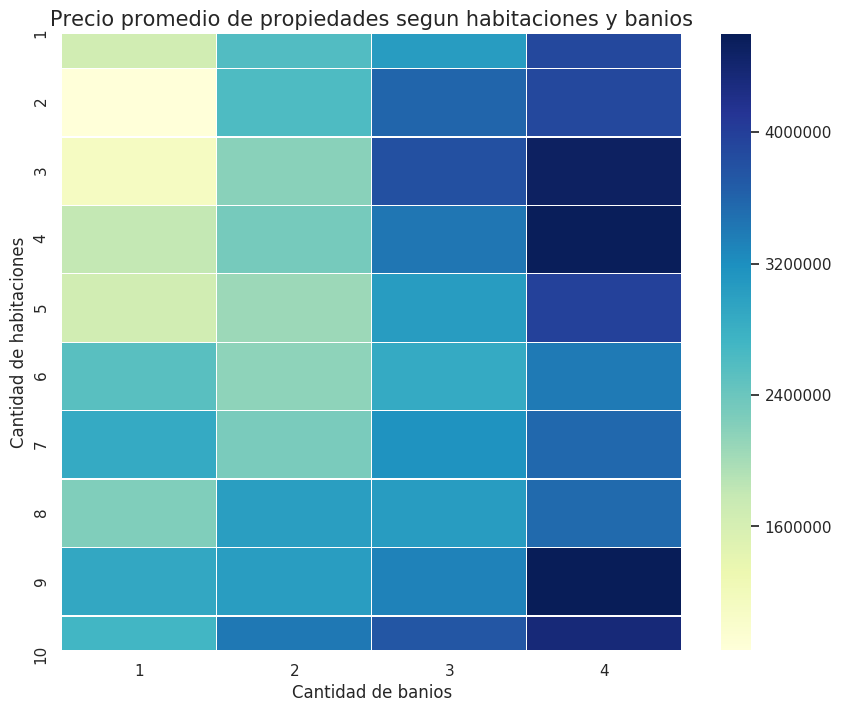

In [87]:
plt.figure(figsize=(10, 8))
g = sns.heatmap(precio_por_habitaciones_banios_unstacked, cmap="YlGnBu", linewidths=0.25)
g.set_title("Precio promedio de propiedades segun habitaciones y banios", fontsize=15)
g.set_xlabel("Cantidad de banios", fontsize=12)
g.set_ylabel("Cantidad de habitaciones", fontsize=12)

#### Precio promedio segun cantidad de garages

In [88]:
precio_segun_garages = df.groupby("garages").agg({"precio" : "mean"})
precio_segun_garages.rename(index={0.00:0, 1.00:1, 2.00:2, 3.00:3}, inplace=True)
precio_segun_garages

,precio
garages,
0,"2,033,282.85"
1,"1,346,327.74"
2,"2,644,485.01"
3,"4,293,016.08"


Text(0, 0.5, 'Precio')

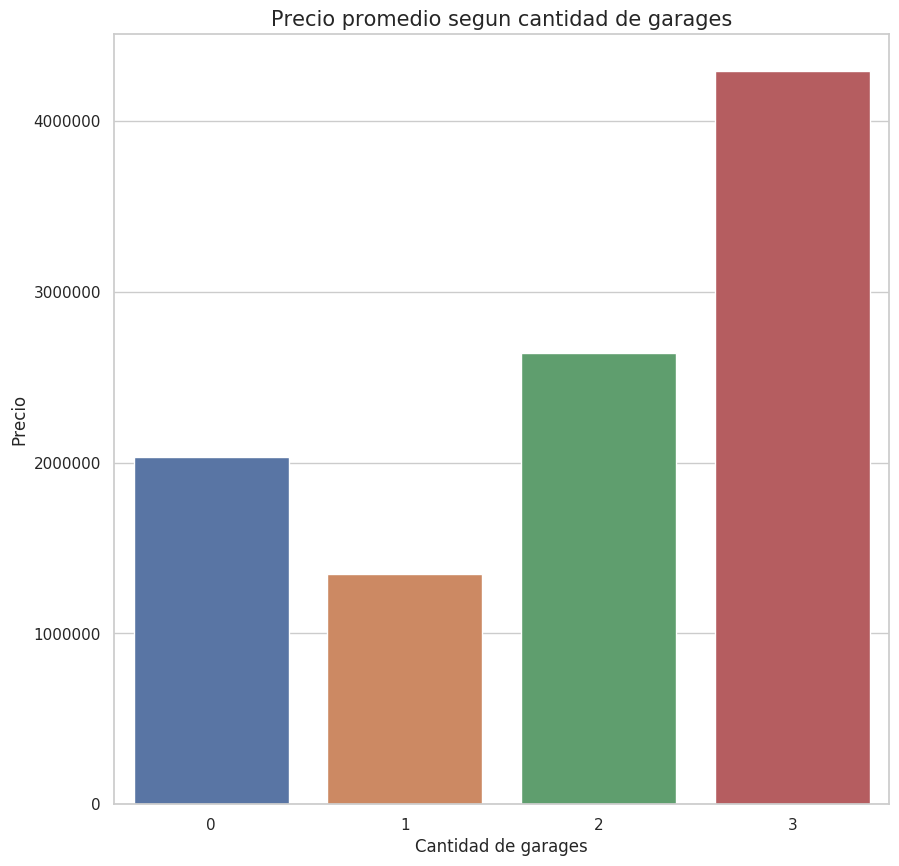

In [89]:
plt.subplots(figsize=(10, 10))
g = sns.barplot(x=precio_segun_garages.index, y=precio_segun_garages["precio"].values)
g.set_title("Precio promedio segun cantidad de garages", fontsize=15)
g.set_xlabel("Cantidad de garages", fontsize=12)
g.set_ylabel("Precio", fontsize=12)

#### Precio promedio segun tipo de propiedad y si poseen gimnasio

In [90]:
publicaciones_con_gym = df.loc[df["gimnasio"] == 1.00, :]
tipo_de_propiedades_con_gym = publicaciones_con_gym["tipo_de_propiedad"].unique()
tipo_de_propiedades_con_gym

array(['Apartamento', 'Casa', 'Casa en condominio',
       'Departamento Compartido', 'Oficina comercial', 'Terreno'],
      dtype=object)

In [91]:
propiedades_con_gym = df.loc[df["tipo_de_propiedad"].isin(tipo_de_propiedades_con_gym), :]
propiedades_con_gym["gimnasio"] = propiedades_con_gym["gimnasio"].map({1.00: "Si", 0.00: "No"})
propiedades_con_gym.head()

/home/facu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,titulo,descripcion,tipo_de_propiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,lng,fecha,gimnasio,usos_multiples,piscina,escuelas_cercanas,centros_comerciales_cercanos,precio,anio,mes
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,nan,2015-08-23,No,0.00,0.00,0.00,0.00,"2,273,000.00",2015,8
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,-99.23,2013-06-28,No,0.00,0.00,1.00,1.00,"3,600,000.00",2013,6
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,...,nan,2015-10-17,No,0.00,0.00,0.00,0.00,"1,200,000.00",2015,10
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,...,-99.69,2012-03-09,No,0.00,0.00,1.00,1.00,"650,000.00",2012,3
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,...,nan,2016-06-07,No,0.00,0.00,0.00,0.00,"1,150,000.00",2016,6


Text(0, 0.5, 'Precio')

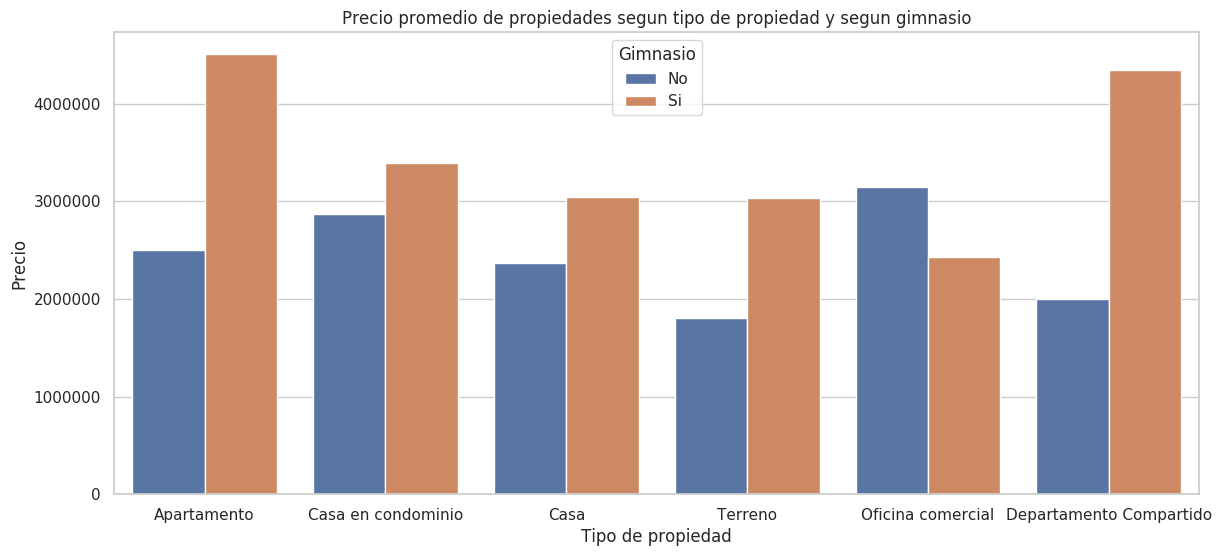

In [92]:
plt.subplots(figsize=(14, 6))
g = sns.barplot(x="tipo_de_propiedad", y="precio", hue="gimnasio", data=propiedades_con_gym, ci=None)
g.legend().set_title("Gimnasio")
g.set_title("Precio promedio de propiedades segun tipo de propiedad y segun gimnasio")
g.set_xlabel("Tipo de propiedad")
g.set_ylabel("Precio")

#### Precio promedio segun tipo de propiedad y si poseen piscina

In [93]:
publicaciones_con_piscina = df.loc[df["piscina"] == 1.00, :]
tipo_de_propiedades_con_piscina = publicaciones_con_piscina["tipo_de_propiedad"].unique()
tipo_de_propiedades_con_piscina

array(['Terreno', 'Casa en condominio', 'Apartamento', 'Casa',
       'Quinta Vacacional', 'Villa', 'Departamento Compartido', 'Rancho',
       'Oficina comercial', nan, 'Terreno comercial', 'Edificio'],
      dtype=object)

In [94]:
# Remuevo NaNs
tipo_de_propiedades_con_piscina = [x for x in tipo_de_propiedades_con_piscina if str(x) != 'nan']
tipo_de_propiedades_con_piscina

['Terreno',
 'Casa en condominio',
 'Apartamento',
 'Casa',
 'Quinta Vacacional',
 'Villa',
 'Departamento Compartido',
 'Rancho',
 'Oficina comercial',
 'Terreno comercial',
 'Edificio']

In [95]:
propiedades_con_piscina = df.loc[df["tipo_de_propiedad"].isin(tipo_de_propiedades_con_piscina), :]
propiedades_con_piscina["piscina"] = propiedades_con_piscina["piscina"].map({1.00: "Si", 0.00: "No"})
propiedades_con_piscina.head()

/home/facu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,titulo,descripcion,tipo_de_propiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,lng,fecha,gimnasio,usos_multiples,piscina,escuelas_cercanas,centros_comerciales_cercanos,precio,anio,mes
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,nan,2015-08-23,0.00,0.00,No,0.00,0.00,"2,273,000.00",2015,8
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,-99.23,2013-06-28,0.00,0.00,No,1.00,1.00,"3,600,000.00",2013,6
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,...,nan,2015-10-17,0.00,0.00,No,0.00,0.00,"1,200,000.00",2015,10
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,...,-99.69,2012-03-09,0.00,0.00,No,1.00,1.00,"650,000.00",2012,3
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,...,nan,2016-06-07,0.00,0.00,No,0.00,0.00,"1,150,000.00",2016,6


Text(0, 0.5, 'Precio')

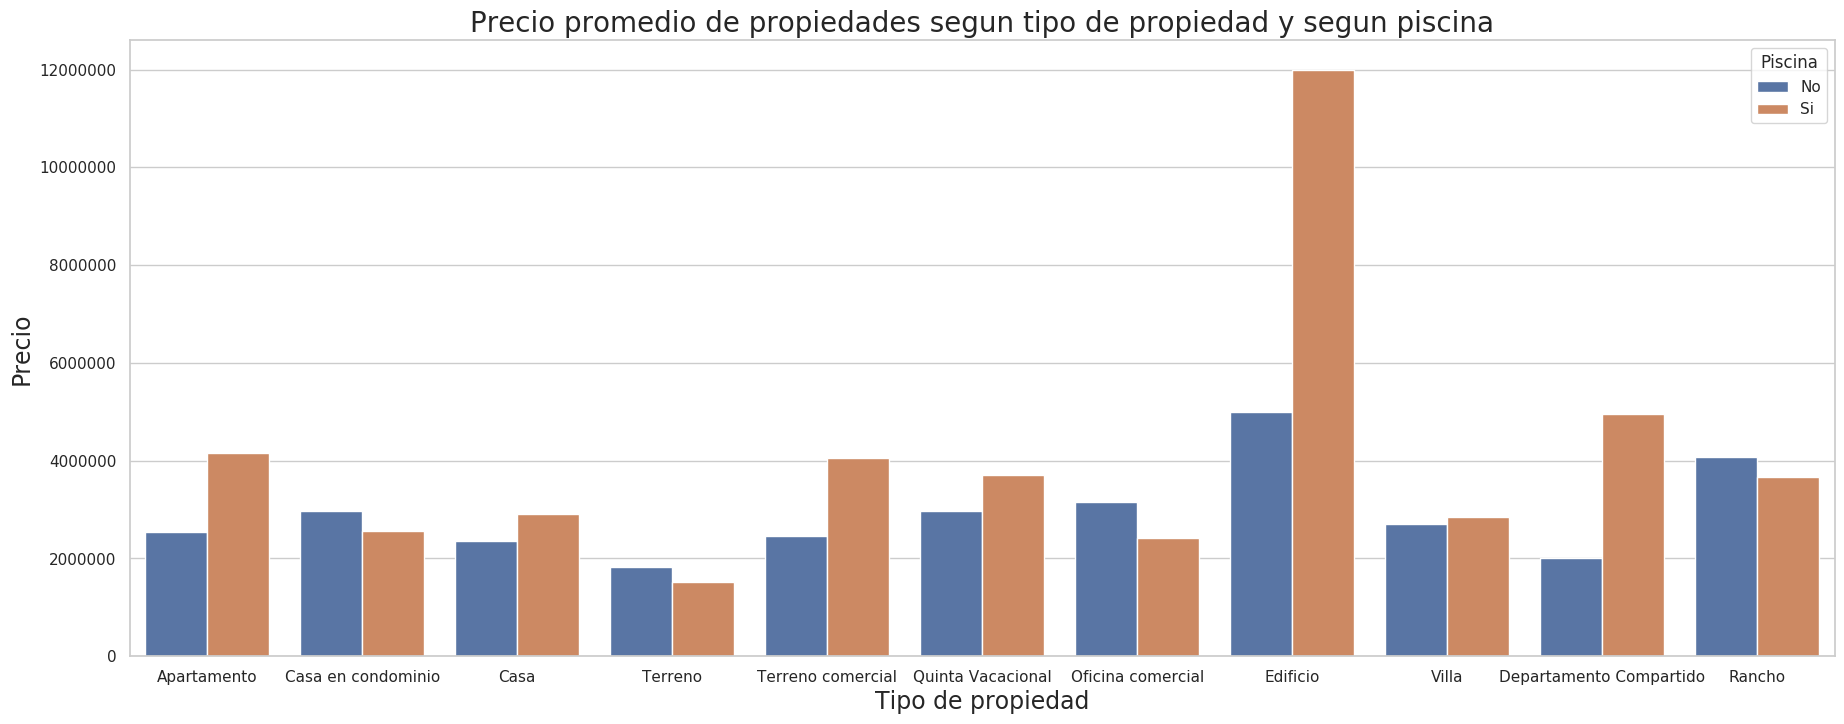

In [96]:
plt.subplots(figsize=(22, 8))
g = sns.barplot(x="tipo_de_propiedad", y="precio", hue="piscina", data=propiedades_con_piscina, ci=None)
plt.ticklabel_format(style='plain', axis='y')
g.legend().set_title("Piscina")
g.set_title("Precio promedio de propiedades segun tipo de propiedad y segun piscina", fontsize=20)
g.set_xlabel("Tipo de propiedad", fontsize=17)
g.set_ylabel("Precio", fontsize=17)

#### Precio promedio segun tipo de propiedad y si poseen SUM

In [97]:
publicaciones_con_sum = df.loc[df["usos_multiples"] == 1.00, :]
tipo_de_propiedades_con_sum = publicaciones_con_sum["tipo_de_propiedad"].unique()
tipo_de_propiedades_con_sum

array(['Casa', 'Casa en condominio', 'Apartamento',
       'Departamento Compartido', 'Oficina comercial', 'Edificio'],
      dtype=object)

In [98]:
propiedades_con_sum = df.loc[df["tipo_de_propiedad"].isin(tipo_de_propiedades_con_sum), :]
propiedades_con_sum["usos_multiples"] = propiedades_con_sum["usos_multiples"].map({1.00: "Si", 0.00: "No"})
propiedades_con_sum.head()

/home/facu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,titulo,descripcion,tipo_de_propiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,lng,fecha,gimnasio,usos_multiples,piscina,escuelas_cercanas,centros_comerciales_cercanos,precio,anio,mes
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,nan,2015-08-23,0.00,No,0.00,0.00,0.00,"2,273,000.00",2015,8
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,-99.23,2013-06-28,0.00,No,0.00,1.00,1.00,"3,600,000.00",2013,6
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,...,nan,2015-10-17,0.00,No,0.00,0.00,0.00,"1,200,000.00",2015,10
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,...,-99.69,2012-03-09,0.00,No,0.00,1.00,1.00,"650,000.00",2012,3
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,...,nan,2016-06-07,0.00,No,0.00,0.00,0.00,"1,150,000.00",2016,6


Text(0, 0.5, 'Precio')

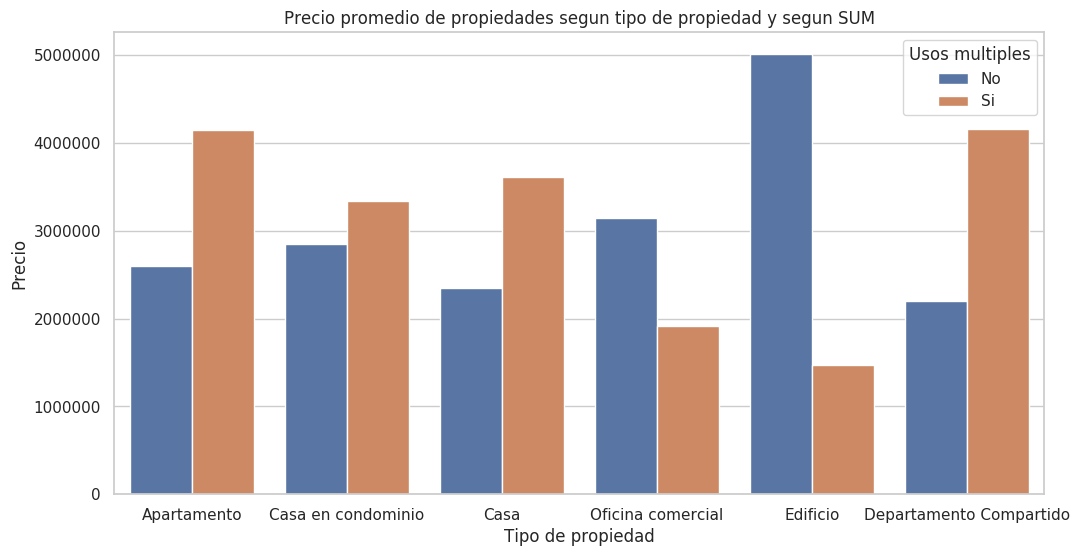

In [99]:
plt.subplots(figsize=(12, 6))
g = sns.barplot(x="tipo_de_propiedad", y="precio", hue="usos_multiples", data=propiedades_con_sum, ci=None)
g.legend().set_title("Usos multiples")
g.set_title("Precio promedio de propiedades segun tipo de propiedad y segun SUM")
g.set_xlabel("Tipo de propiedad")
g.set_ylabel("Precio")